# 2.1. GIẢI THUẬT 1

## 2.1.1. Ôn tập lý thuyết

**1. Quy trình CRISP–DM (Cross Industry Standard Process for Data Mining)**  
- Gồm 6 giai đoạn có thể lặp lại:  
  - **Business Understanding** – Hiểu mục tiêu kinh doanh, đặt câu hỏi cần giải.  
  - **Data Understanding** – Thu thập, khám phá dữ liệu, kiểm tra chất lượng.  
  - **Data Preparation** – Làm sạch, xử lý dữ liệu thiếu, mã hóa biến, chọn đặc trưng.  
  - **Modeling** – Chọn và huấn luyện mô hình (Decision Tree, Random Forest, SVM…).  
  - **Evaluation** – Đánh giá xem mô hình có đạt mục tiêu kinh doanh hay không.  
  - **Deployment** – Triển khai mô hình vào sản phẩm hoặc quy trình thực tế.

**Quy trình SEMMA (Sample – Explore – Modify – Model – Assess)**  
- **Sample**: Lấy mẫu dữ liệu đại diện.  
- **Explore**: Khám phá và trực quan hóa dữ liệu.  
- **Modify**: Tiền xử lý, biến đổi, tạo biến mới.  
- **Model**: Huấn luyện mô hình.  
- **Assess**: Đánh giá hiệu quả và tính ổn định.

*Khác biệt chính*: CRISP–DM định hướng **kinh doanh**, còn SEMMA thiên về **kỹ thuật khai phá dữ liệu**.

**2. Cây quyết định hoạt động như thế nào**  
- **Nút gốc (root node)**: điểm bắt đầu, chứa toàn bộ dữ liệu.  
- **Nhánh (branch)**: điều kiện tách dữ liệu (ví dụ: *age > 40*).  
- **Nút trong (internal node)**: các điểm chia tiếp theo.  
- **Nút lá (leaf/terminal node)**: chứa nhãn dự đoán hoặc giá trị cuối cùng.

*Một mẫu mới được dự đoán* bằng cách đi từ gốc → kiểm tra điều kiện tại mỗi nút → đi theo nhánh đúng → đến nút lá → lấy kết quả dự đoán.

**3. Các tiêu chí phân tách (Splitting Criteria)**

**Entropy** – đo độ hỗn loạn:  

$$ Entropy(S) = - \sum_{i=1}^{c} p_i \log_2 p_i $$

**Information Gain (IG)** – lượng thông tin thu được sau khi tách:  

$$ IG = Entropy(parent) - \sum_{i=1}^{k} \frac{n_i}{n} \cdot Entropy(child_i) $$

**Gini Index** – đo độ thuần khiết:  

$$ Gini = 1 - \sum_{i=1}^{c} p_i^2 $$

*So sánh nhanh*:  
- Information Gain & Entropy dùng khái niệm thông tin, tính chậm hơn một chút.  
- Gini tính nhanh hơn, thường được dùng trong thuật toán CART.  
- Kết quả tách gần giống nhau, khác biệt chủ yếu ở tốc độ tính toán.


**4. Random Forest là gì và khác gì so với cây quyết định đơn lẻ**  
- Random Forest là tập hợp nhiều cây quyết định, mỗi cây được huấn luyện trên **bootstrap sample** và chọn đặc trưng ngẫu nhiên tại mỗi nút.  
- Giảm hiện tượng **overfitting** của một cây đơn lẻ.  
- Kết quả cuối cùng được **bỏ phiếu (classification)** hoặc **lấy trung bình (regression)** từ nhiều cây.

*Ưu điểm so với cây đơn*:  
- Ổn định hơn, chính xác hơn.  
- Chống nhiễu, giảm phương sai nhờ tính ngẫu nhiên và trung bình hóa.

**5. Ưu điểm và hạn chế của Decision Tree và Random Forest**

**Cây quyết định**  
- **Ưu điểm**: Dễ hiểu, trực quan, không cần chuẩn hóa dữ liệu, giải thích tốt.  
- **Nhược điểm**: Dễ overfit, nhạy với dữ liệu nhiễu hoặc thay đổi nhỏ, kém khi dữ liệu không cân bằng.

**Random Forest**  
- **Ưu điểm**: Độ chính xác cao, ít overfit, xử lý dữ liệu thiếu & nhiễu tốt, đánh giá được tầm quan trọng đặc trưng.  
- **Nhược điểm**: Khó giải thích vì có nhiều cây, tốn tài nguyên tính toán, dự đoán chậm hơn khi nhiều cây.

*Cây quyết định kém hiệu quả* khi dữ liệu nhiễu, nhiều biến liên tục, hoặc yêu cầu mô hình tổng quát cao.

**6. Viết code mẫu xây dựng Decision Tree bằng Python (Scikit-learn)**

Các bước thực hiện:  
- Chuẩn bị dữ liệu (đọc file, xử lý thiếu).  
- Chia tập train/test.  
- Khởi tạo `DecisionTreeClassifier`.  
- Huấn luyện mô hình.  
- Đánh giá kết quả (accuracy, confusion matrix…).  
- Vẽ cây để trực quan hóa.

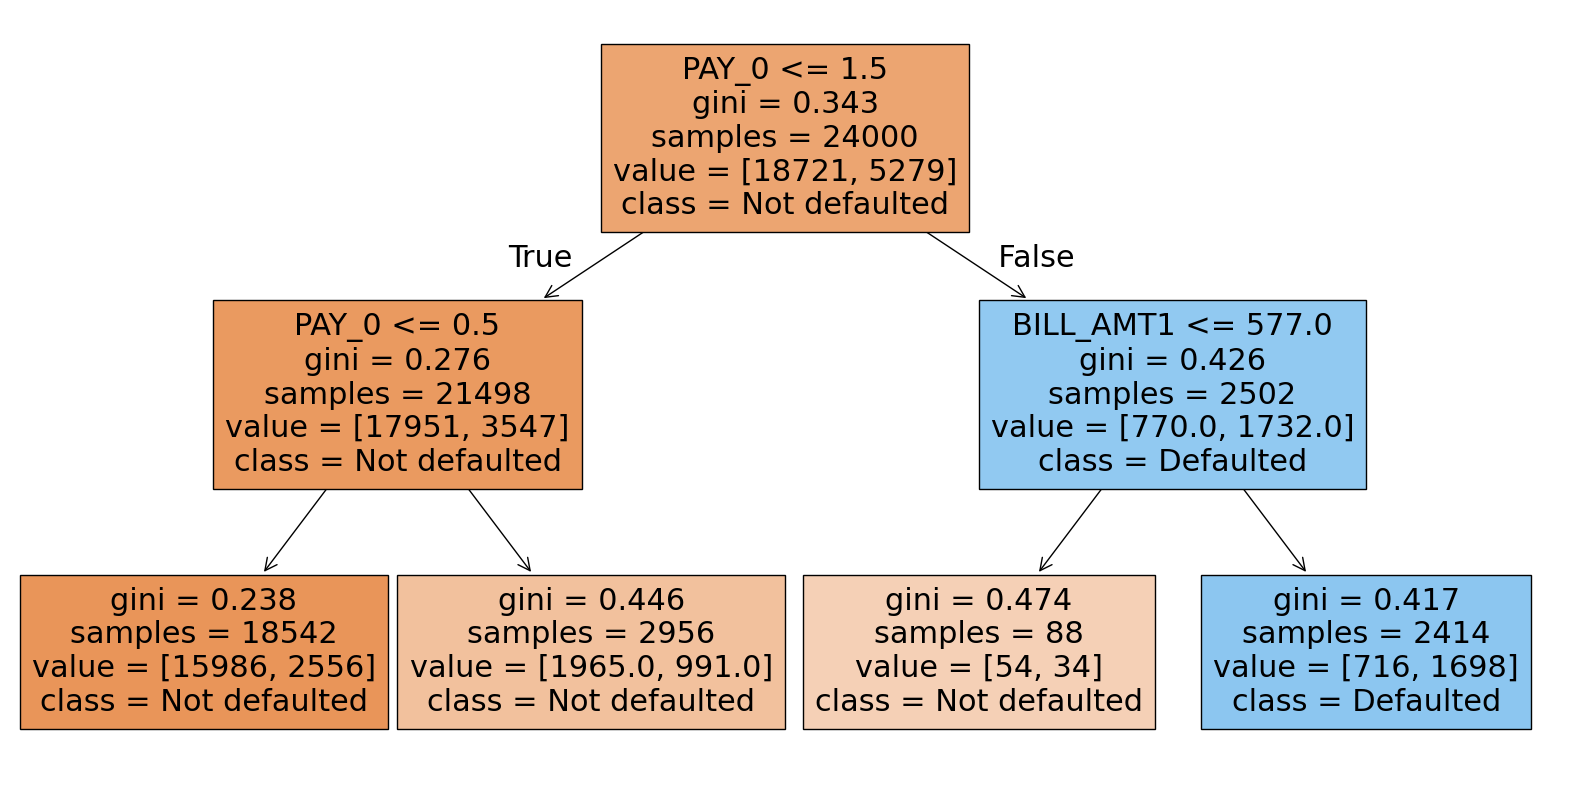

In [11]:
# Import các package cần thiết
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt    
import matplotlib as mpl         
import graphviz                  
from sklearn import tree          
from sklearn.model_selection import train_test_split  

# Cấu hình hiển thị hình ảnh trong notebook
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100    

# Đọc dữ liệu
df = pd.read_csv('UCI_Credit_Card.csv')  
df.head()                                

# Lấy danh sách tên cột
features_response = df.columns.tolist()

# Loại bỏ các cột không cần thiết để huấn luyện mô hình
items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

# Giữ lại các cột không thuộc danh sách loại bỏ
features_response = [item for item in features_response if item not in items_to_remove]
features_response   

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,             
    df['default.payment.next.month'].values,       
    test_size=0.2,                                 
    random_state=24                               
)

# Khởi tạo mô hình Decision Tree
dt = tree.DecisionTreeClassifier(max_depth=2)      
dt.fit(X_train, y_train)                           

# Vẽ cây quyết định
plt.figure(figsize=(20, 10))                       
tree.plot_tree(
    dt,
    feature_names=features_response[:-1],          
    class_names=['Not defaulted', 'Defaulted'],    
    filled=True                                    
)
plt.show()


**7. Triển khai Random Forest trong Python và các tham số thường chỉnh**

- Sử dụng `RandomForestClassifier` để huấn luyện mô hình.  
- Các tham số hay chỉnh:  
  - **n_estimators**: số lượng cây.  
  - **max_depth**: độ sâu tối đa.  
  - **min_samples_split**, **min_samples_leaf**: điều kiện tách.  
  - **max_features**: số đặc trưng chọn ở mỗi nút.  
  - **bootstrap**: bật/tắt lấy mẫu có lặp.

**8. Đánh giá tầm quan trọng của đặc trưng trong Random Forest**

- Sau khi huấn luyện Random Forest, có thể dùng `feature_importances_` để xem mức độ quan trọng của từng biến đầu vào.  
- Có thể sắp xếp và vẽ biểu đồ để trực quan hóa.

**9. Điều chỉnh siêu tham số (Hyperparameter Tuning) cho Decision Tree và Random Forest**

- Có thể dùng **GridSearchCV** để thử nhiều bộ tham số và chọn bộ tốt nhất.  
- **RandomizedSearchCV** cũng tương tự nhưng lấy mẫu ngẫu nhiên từ không gian tham số, nhanh hơn khi có nhiều lựa chọn.

**Các bước điều chỉnh siêu tham số (Hyperparameter Tuning) cho Decision Tree và Random Forest trên dataset UCI_Credit_Card**

- Bước 1: Chuẩn bị dữ liệu tương tự (đọc file, chọn target là `default.payment.next.month`, chia train/test).  
- Bước 2: Xác định các siêu tham số cần tối ưu, ví dụ:  
  - Đối với **Decision Tree**: `max_depth`, `min_samples_split`, `min_samples_leaf`, `criterion`.  
  - Đối với **Random Forest**: `n_estimators`, `max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`.  
- Bước 3: Tạo **lưới tham số (param_grid)** với các giá trị muốn thử nghiệm.  
- Bước 4: Khởi tạo **GridSearchCV** hoặc **RandomizedSearchCV**:  
  - Chỉ định mô hình (DecisionTreeClassifier hoặc RandomForestClassifier).  
  - Đặt số lần cross-validation (cv=5 hoặc 10).  
  - Chọn metric đánh giá (thường là `accuracy`).  
- Bước 5: Gọi `fit()` trên tập train để GridSearchCV/RandomizedSearchCV thử tất cả các tổ hợp tham số và chọn mô hình tốt nhất.  
- Bước 6: Xem `best_params_` để biết bộ tham số tối ưu.  
- Bước 7: Dùng mô hình tốt nhất để dự đoán trên tập test và đánh giá kết quả.  
- Bước 8: Nếu dữ liệu lớn hoặc nhiều tham số, nên dùng **RandomizedSearchCV** để tiết kiệm thời gian.

## 2.1.2. Bài làm mẫu  
### Bài toán 1: Xây dựng cây quyết định và rừng cây với dữ liệu "Default of Credit Card Clients"
---
**Nguồn dữ liệu:** [https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

#### Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

### 1. Cài đặt và import các thư viện cần thiết

In [1]:
!pip install numpy pandas matplotlib scikit-learn graphviz


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

### 2. Nạp dữ liệu và loại bỏ các biến không cần thiết

In [3]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

### 3. Chuẩn bị dữ liệu cho tập train và tập test

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

### 4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [5]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


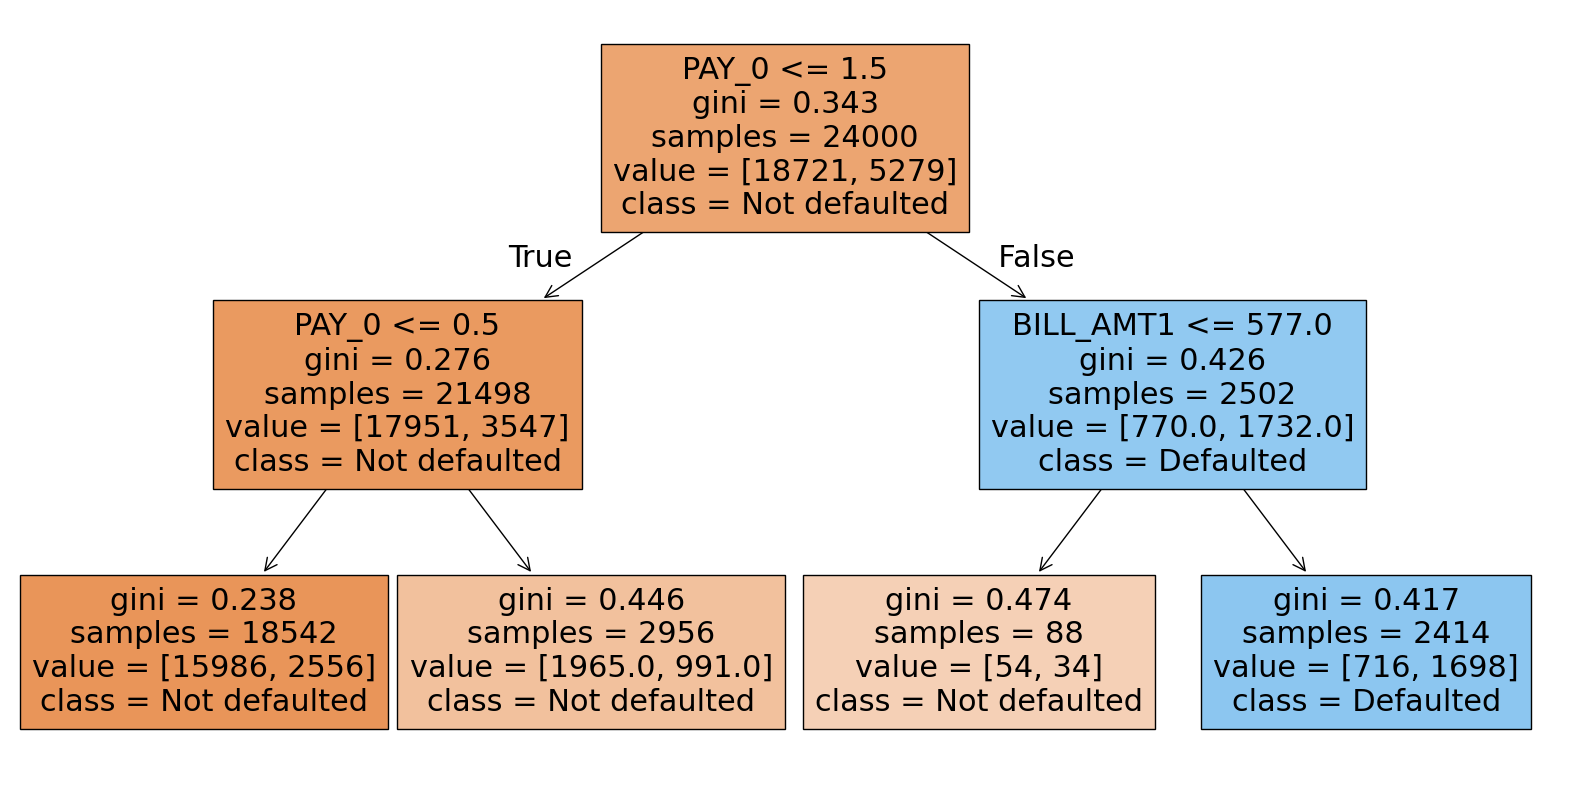

In [6]:
import graphviz
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt,
    feature_names=features_response[:-1],
    class_names=['Not defaulted', 'Defaulted'],
    filled=True
)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

### Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô 


### 1. Chuẩn bị dữ liệu

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [8]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

### 2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}
dt = tree.DecisionTreeClassifier(random_state=24)

cv = GridSearchCV(
    dt,
    param_grid=params,
    scoring='roc_auc',       
    n_jobs=None,
    refit=True,
    cv=4,                     
    verbose=1,
    error_score=np.nan,
    return_train_score=True
)

cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


,estimator,DecisionTreeC...ndom_state=24)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


## Giải thích tham số:

scoring='roc_auc': dùng diện tích dưới đường cong ROC để đánh giá

cv=4: chia dữ liệu thành 4 phần để cross-validation

return_train_score=True: lưu cả điểm train để so sánh bias và variance

### 3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

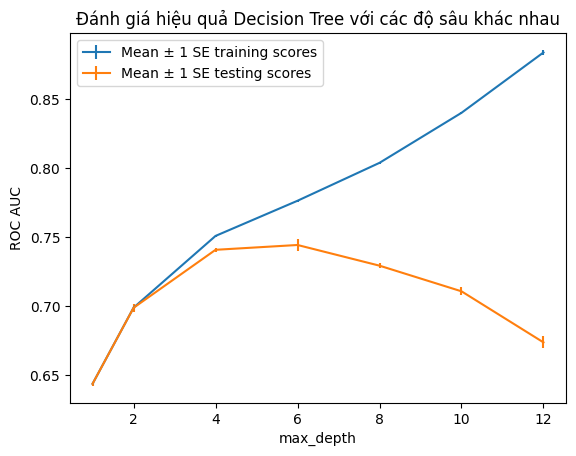

**Hình 2.2**: Biểu đồ đánh giá hiệu quả thực hiện cây quyết định với cá chiều sâu khác nhau.

In [11]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_train_score', 'mean_test_score']].head()

ax = plt.axes()

# Vẽ đường train
ax.errorbar(
    cv_results_df['param_max_depth'],
    cv_results_df['mean_train_score'],
    yerr=cv_results_df['std_train_score']/np.sqrt(4),
    label='Mean ± 1 SE training scores'
)

# Vẽ đường test
ax.errorbar(
    cv_results_df['param_max_depth'],
    cv_results_df['mean_test_score'],
    yerr=cv_results_df['std_test_score']/np.sqrt(4),
    label='Mean ± 1 SE testing scores'
)

ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Đánh giá hiệu quả Decision Tree với các độ sâu khác nhau')
plt.savefig("decision_tree_depth.png", dpi=300, bbox_inches='tight')
plt.show()

from IPython.display import Markdown, display
display(Markdown("**Hình 2.2**: Biểu đồ đánh giá hiệu quả thực hiện cây quyết định với cá chiều sâu khác nhau."))

### Nhiệm vụ 3: Nhiệm vụ 3: Xây dựng rừng cây (random forest)

## 1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [13]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

## 2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
 (n_estimators=10, criterion='gini', max_depth=3,
 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
 bootstrap=True, oob_score=False, n_jobs=None,
 random_state=4, verbose=0, warm_start=False, class_weight=None)

## 3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [16]:
from sklearn.model_selection import GridSearchCV

rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',
    refit=True,
    cv=4,
    verbose=1,
    error_score=np.nan,
    return_train_score=True
)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestC...andom_state=4)
,param_grid,"{'n_estimators': [10, 20, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,60


## 4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

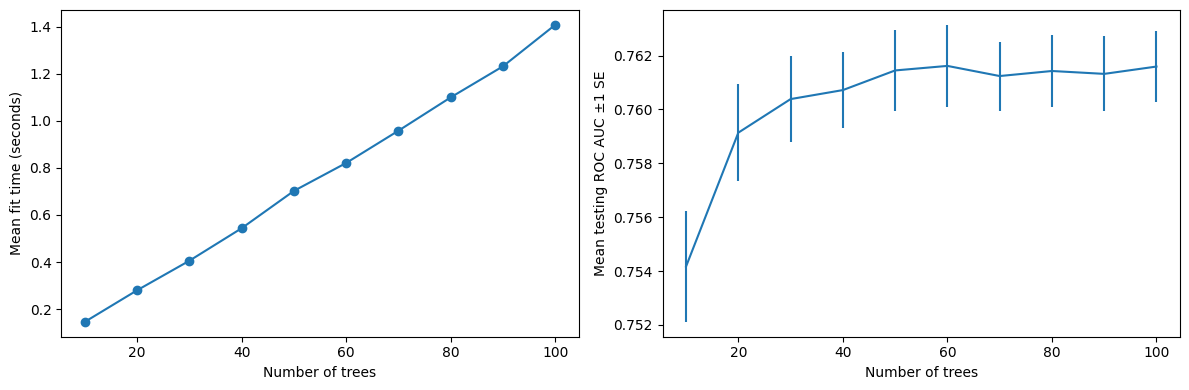

**Hình 2.3**: Biểu đồ thể hiện mối quan hệ giữa số cây với Mean Fit Time và Mean Testing ROC AUC.

In [17]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Biểu đồ 1: Mean fit time
axs[0].plot(
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_fit_time'],
    '-o'
)
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

# Biểu đồ 2: Mean testing ROC AUC
axs[1].errorbar(
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_test_score'],
    yerr=cv_rf_ex_results_df['std_test_score'] / np.sqrt(4)
)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ±1 SE')
plt.tight_layout()
plt.savefig("roc_auc.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 2.3**: Biểu đồ thể hiện mối quan hệ giữa số cây với Mean Fit Time và Mean Testing ROC AUC."))


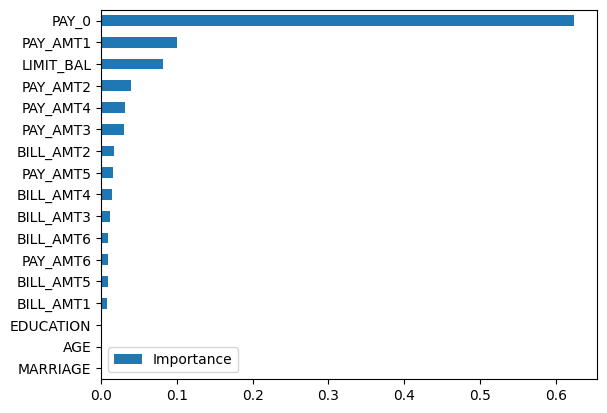

**Hình 2.4**: Biểu đồ hiển thị mức độ quan trọng của từng feature trong mô hình Random Forest tối ưu.

In [18]:
# {'n_estimators': 50}
cv_rf_ex.best_params_

# the feature names and importances
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_},
    index=features_response[:-1]
)

feat_imp_df.sort_values('Importance', ascending=True).plot.barh()

# 💾 Lưu ảnh trước khi hiển thị
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')

plt.show()

from IPython.display import Markdown, display
display(Markdown("**Hình 2.4**: Biểu đồ hiển thị mức độ quan trọng của từng feature trong mô hình Random Forest tối ưu."))

### 2.1.3. Bài tập thực hành 1
Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ 
---
**Nguồn dữ liệu:** [https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset](https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset)

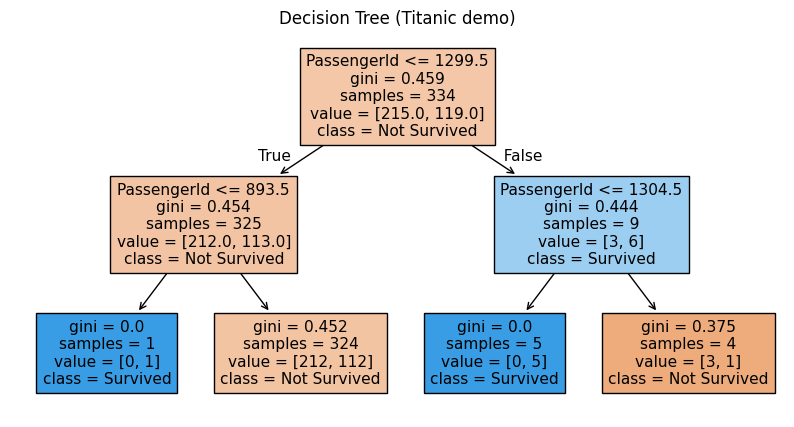

**Hình 2.1.3.1**: Cây quyết định huấn luyện từ dữ liệu Titanic demo.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# 1. Đọc dữ liệu
df = pd.read_csv("gender_submission.csv")

# Gắn nhãn
X = df[['PassengerId']].values
y = df['Survived'].values

# 2. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24)

# 3. Huấn luyện Decision Tree
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=24)
dt.fit(X_train, y_train)

# 4. Vẽ cây quyết định
plt.figure(figsize=(10,5))
tree.plot_tree(dt, feature_names=['PassengerId'],
               class_names=['Not Survived','Survived'],
               filled=True)
plt.title("Decision Tree (Titanic demo)")
plt.savefig("decision_tree_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 2.1.3.1**: Cây quyết định huấn luyện từ dữ liệu Titanic demo."))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


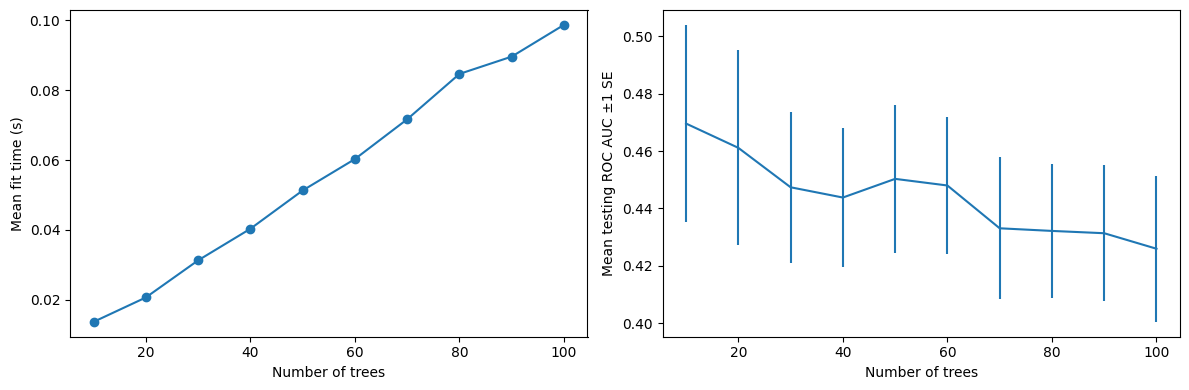

**Hình 2.1.3.2**: Biểu đồ mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC.

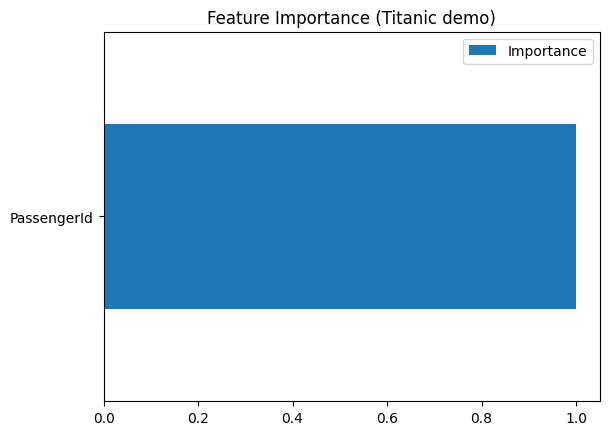

**Hình 2.1.3.3**: Biểu đồ mức độ quan trọng của đặc trưng trong Random Forest.

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo Random Forest
rf = RandomForestClassifier(max_depth=3, random_state=4)

# --- GridSearchCV tìm số cây ---
rf_params_ex = {'n_estimators': list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf,
                        param_grid=rf_params_ex,
                        scoring='roc_auc',
                        cv=4,
                        return_train_score=True,
                        verbose=1)
cv_rf_ex.fit(X_train, y_train)

# Biểu đồ số cây vs thời gian + ROC AUC
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (s)')

axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/4**0.5)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ±1 SE')

plt.tight_layout()
plt.savefig("random_forest_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 2.1.3.2**: Biểu đồ mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC."))

# Feature Importance
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_},
    index=['PassengerId']
)

feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.title("Feature Importance (Titanic demo)")
plt.savefig("feature_importance_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 2.1.3.3**: Biểu đồ mức độ quan trọng của đặc trưng trong Random Forest."))


## 2.1.4. Bài thực hành 2

### Xây dựng cây quyết định

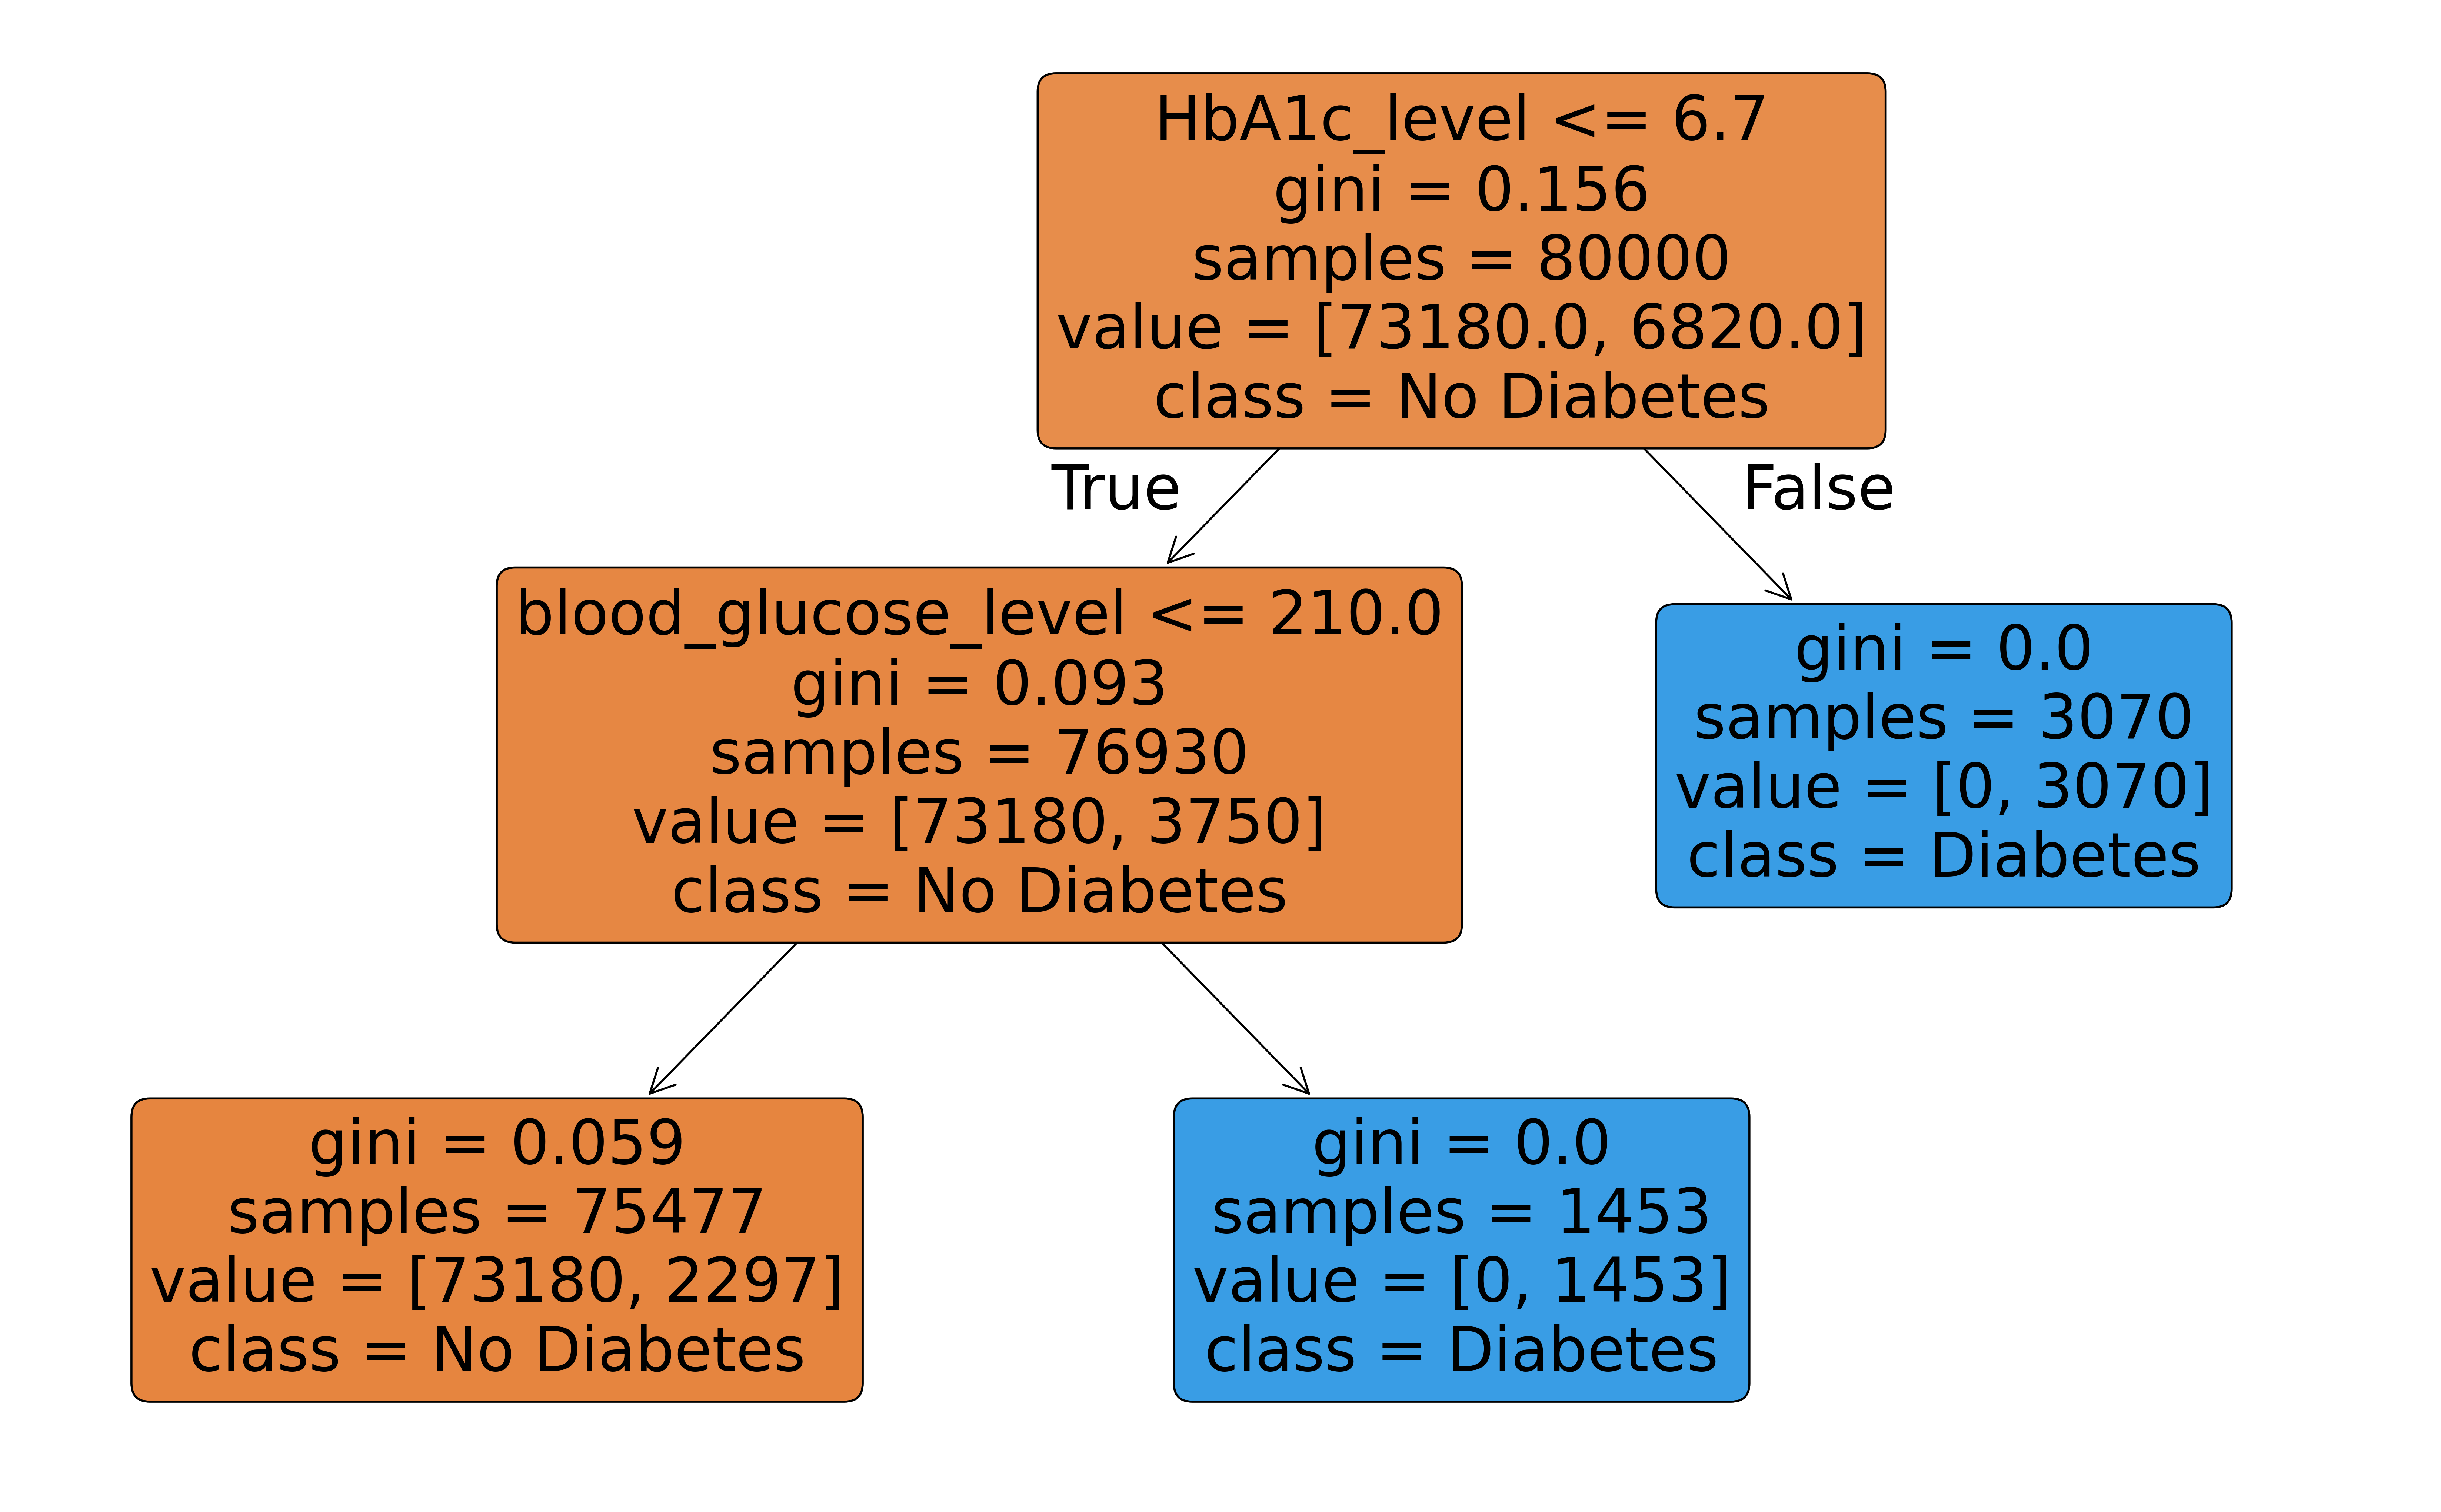

**Hình 2.1.4.1**: Cây quyết định.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
df = pd.read_csv('diabetes_prediction_dataset.csv')

# 2. X, y và mã hóa cột chuỗi
X = df.drop(columns=['diabetes'])
y = df['diabetes']
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# 4. Huấn luyện cây quyết định
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=24)
dt.fit(X_train, y_train)

# 5. Vẽ cây trực tiếp (không cần graphviz/dot)
plt.figure(figsize=(21,13))
tree.plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No Diabetes','Diabetes'],
    filled=True,
    rounded=True
)
plt.savefig("decision_tree_diabetes.png", dpi=300, bbox_inches='tight')
plt.show()
display(Markdown("**Hình 2.1.4.1**: Cây quyết định."))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


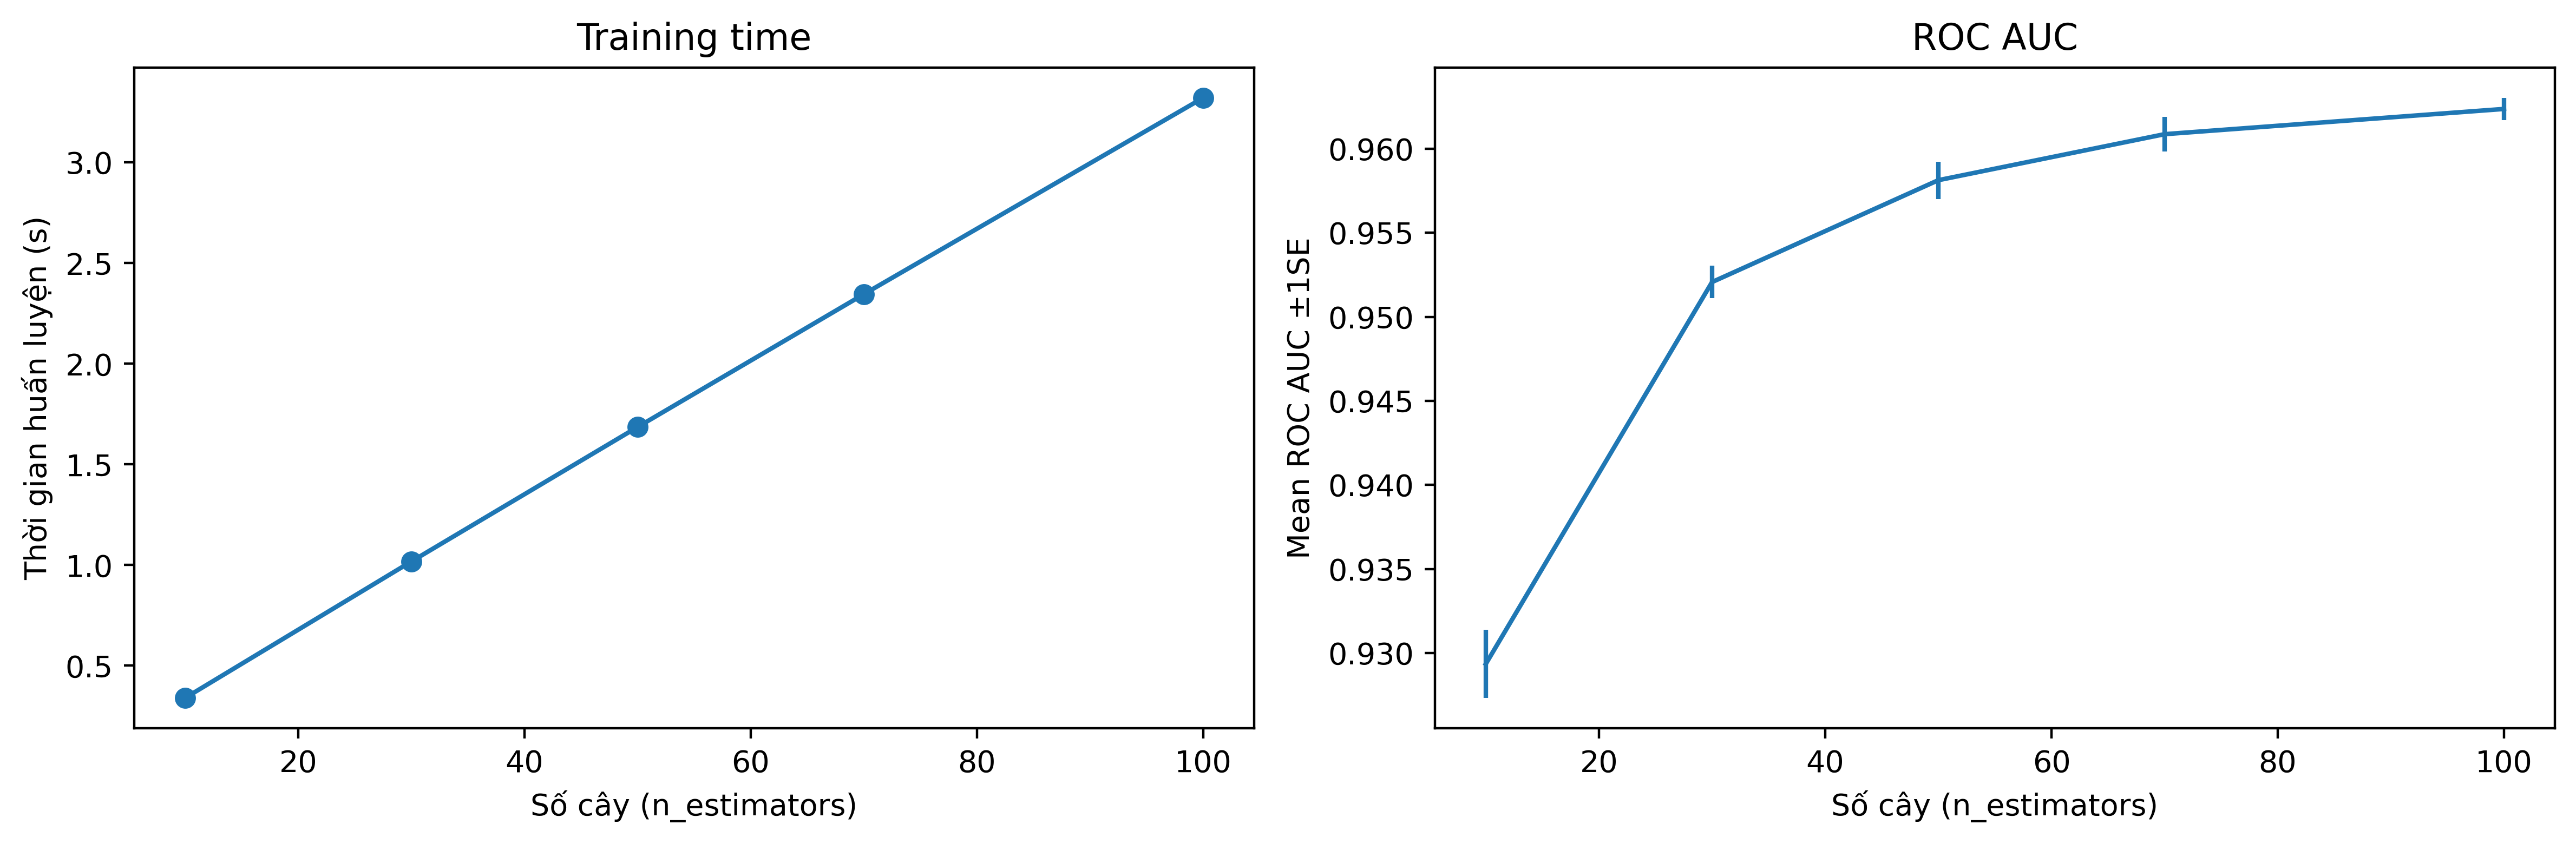

**Hình 3**: Mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC.

**Thông số tốt nhất Random Forest**: {'n_estimators': 100}

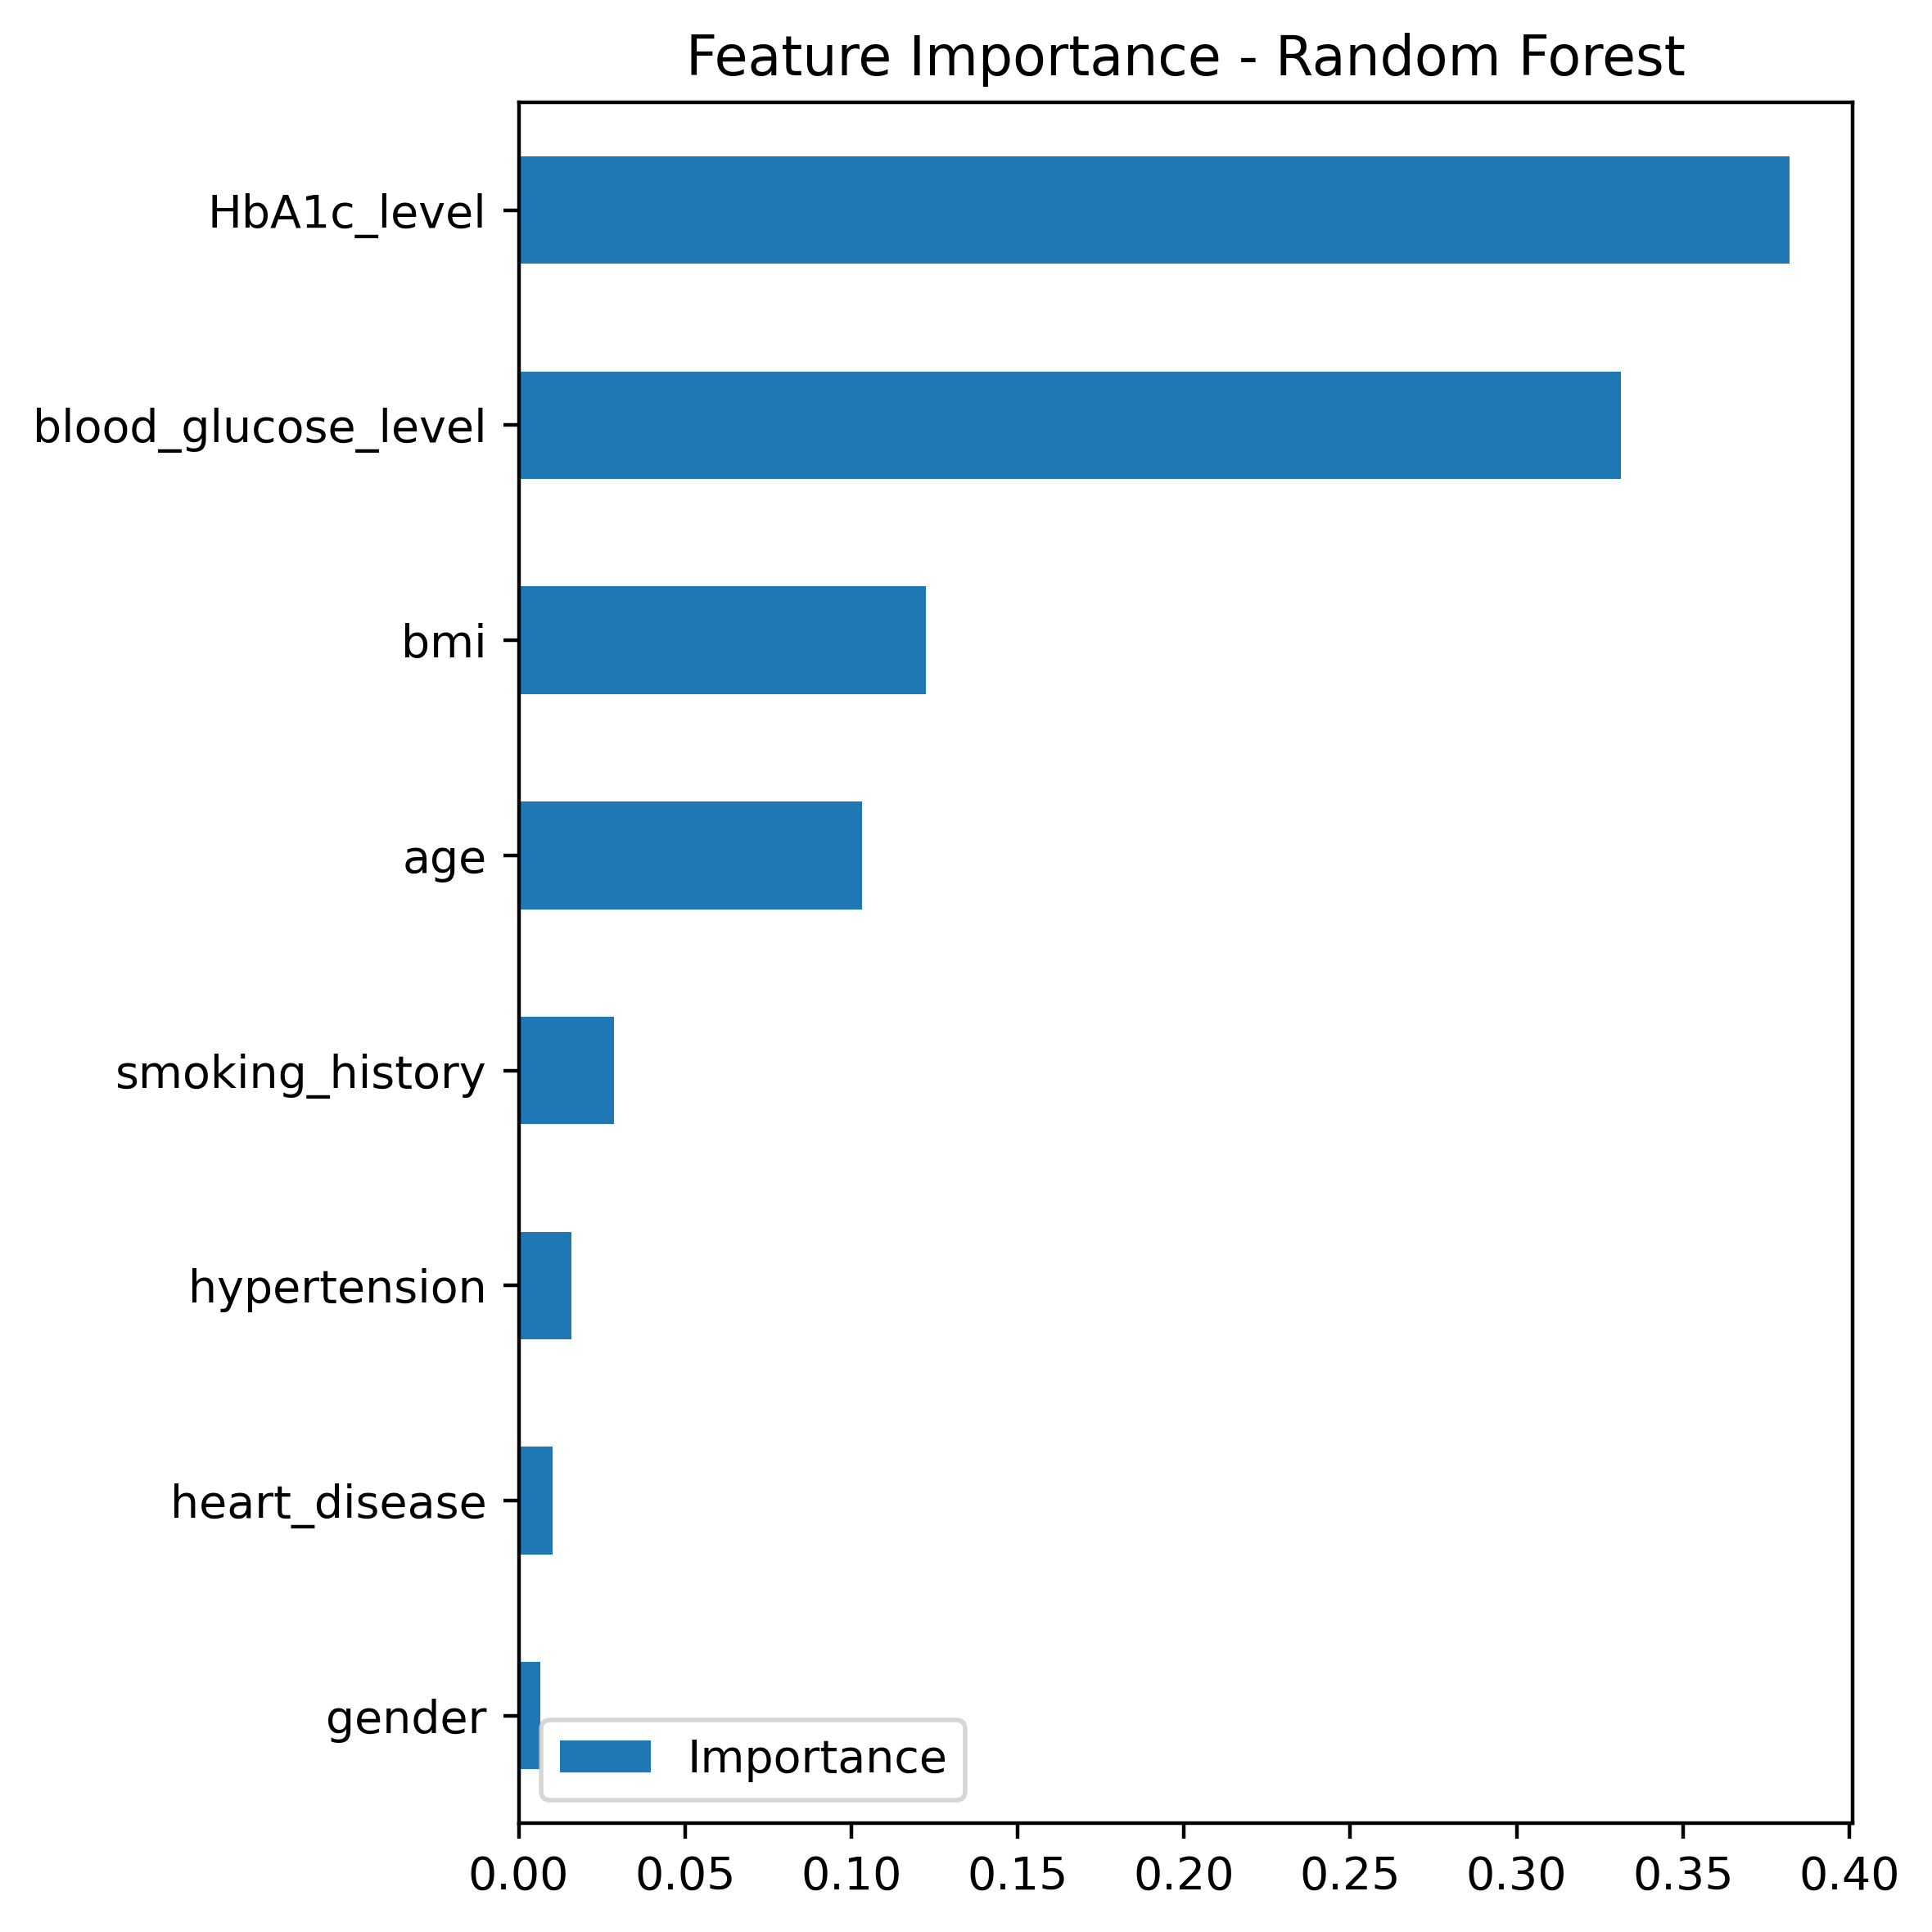

**Hình 4**: Mức độ quan trọng của các đặc trưng trong Random Forest.

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_params = {'n_estimators': [10, 30, 50, 70, 100]}

cv_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='roc_auc',
    refit=True,
    cv=4,
    return_train_score=True,
    verbose=1
)

cv_rf.fit(X_train, y_train)

cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(cv_rf_results_df['param_n_estimators'], cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Số cây (n_estimators)')
axs[0].set_ylabel('Thời gian huấn luyện (s)')
axs[0].set_title('Training time')

axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Số cây (n_estimators)')
axs[1].set_ylabel('Mean ROC AUC ±1SE')
axs[1].set_title('ROC AUC')

plt.tight_layout()
plt.savefig("random_forest_grid.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 2.1.4.2**: Mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC."))
display(Markdown(f"**Thông số tốt nhất Random Forest**: {cv_rf.best_params_}"))

# Feature importance
best_rf = cv_rf.best_estimator_
feat_imp_df = pd.DataFrame({'Importance': best_rf.feature_importances_},
                           index=X.columns)
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(figsize=(6,6))
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("random_forest_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 2.1.4.3**: Mức độ quan trọng của các đặc trưng trong Random Forest."))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


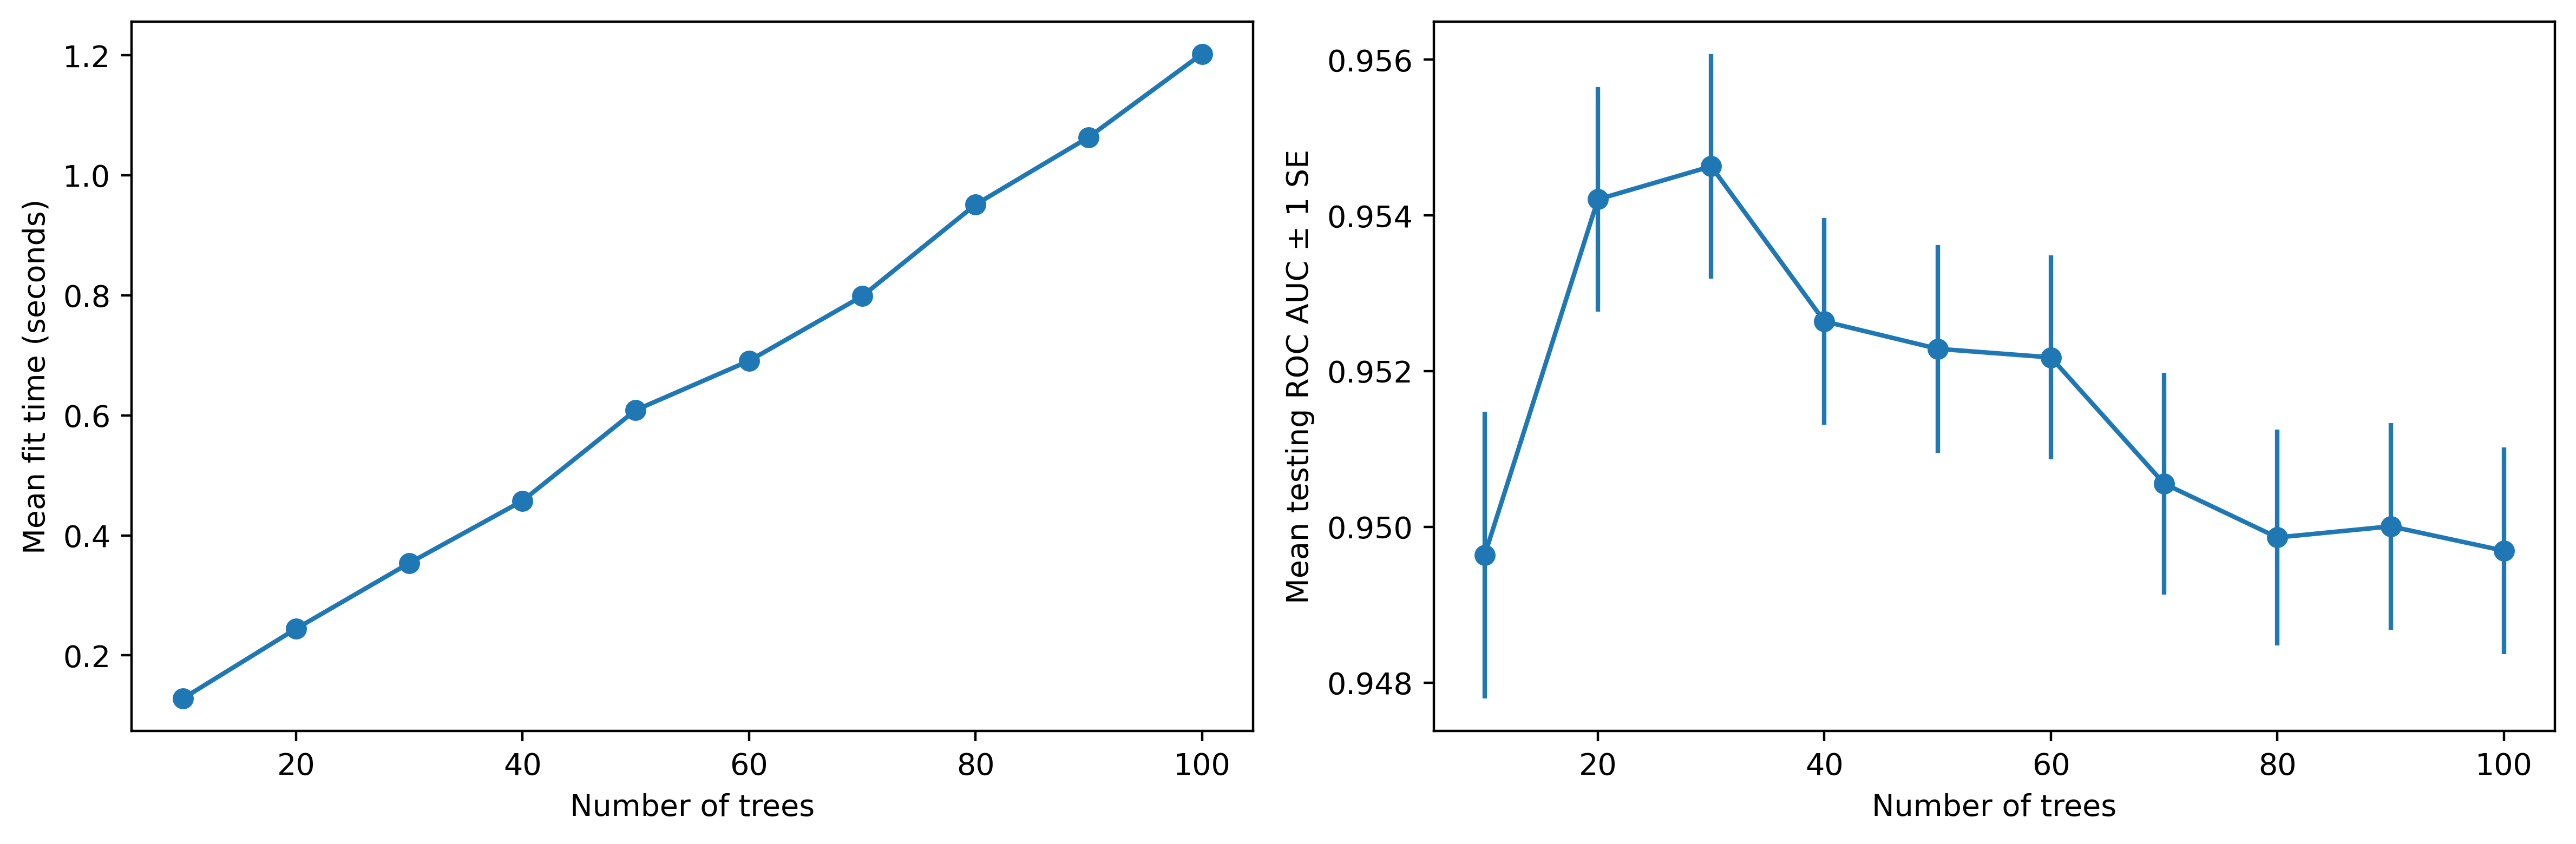

**Hình 2.1.4.4**: Mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC.

Best number of trees: {'n_estimators': 30}
Best ROC AUC: 0.9546312270631448


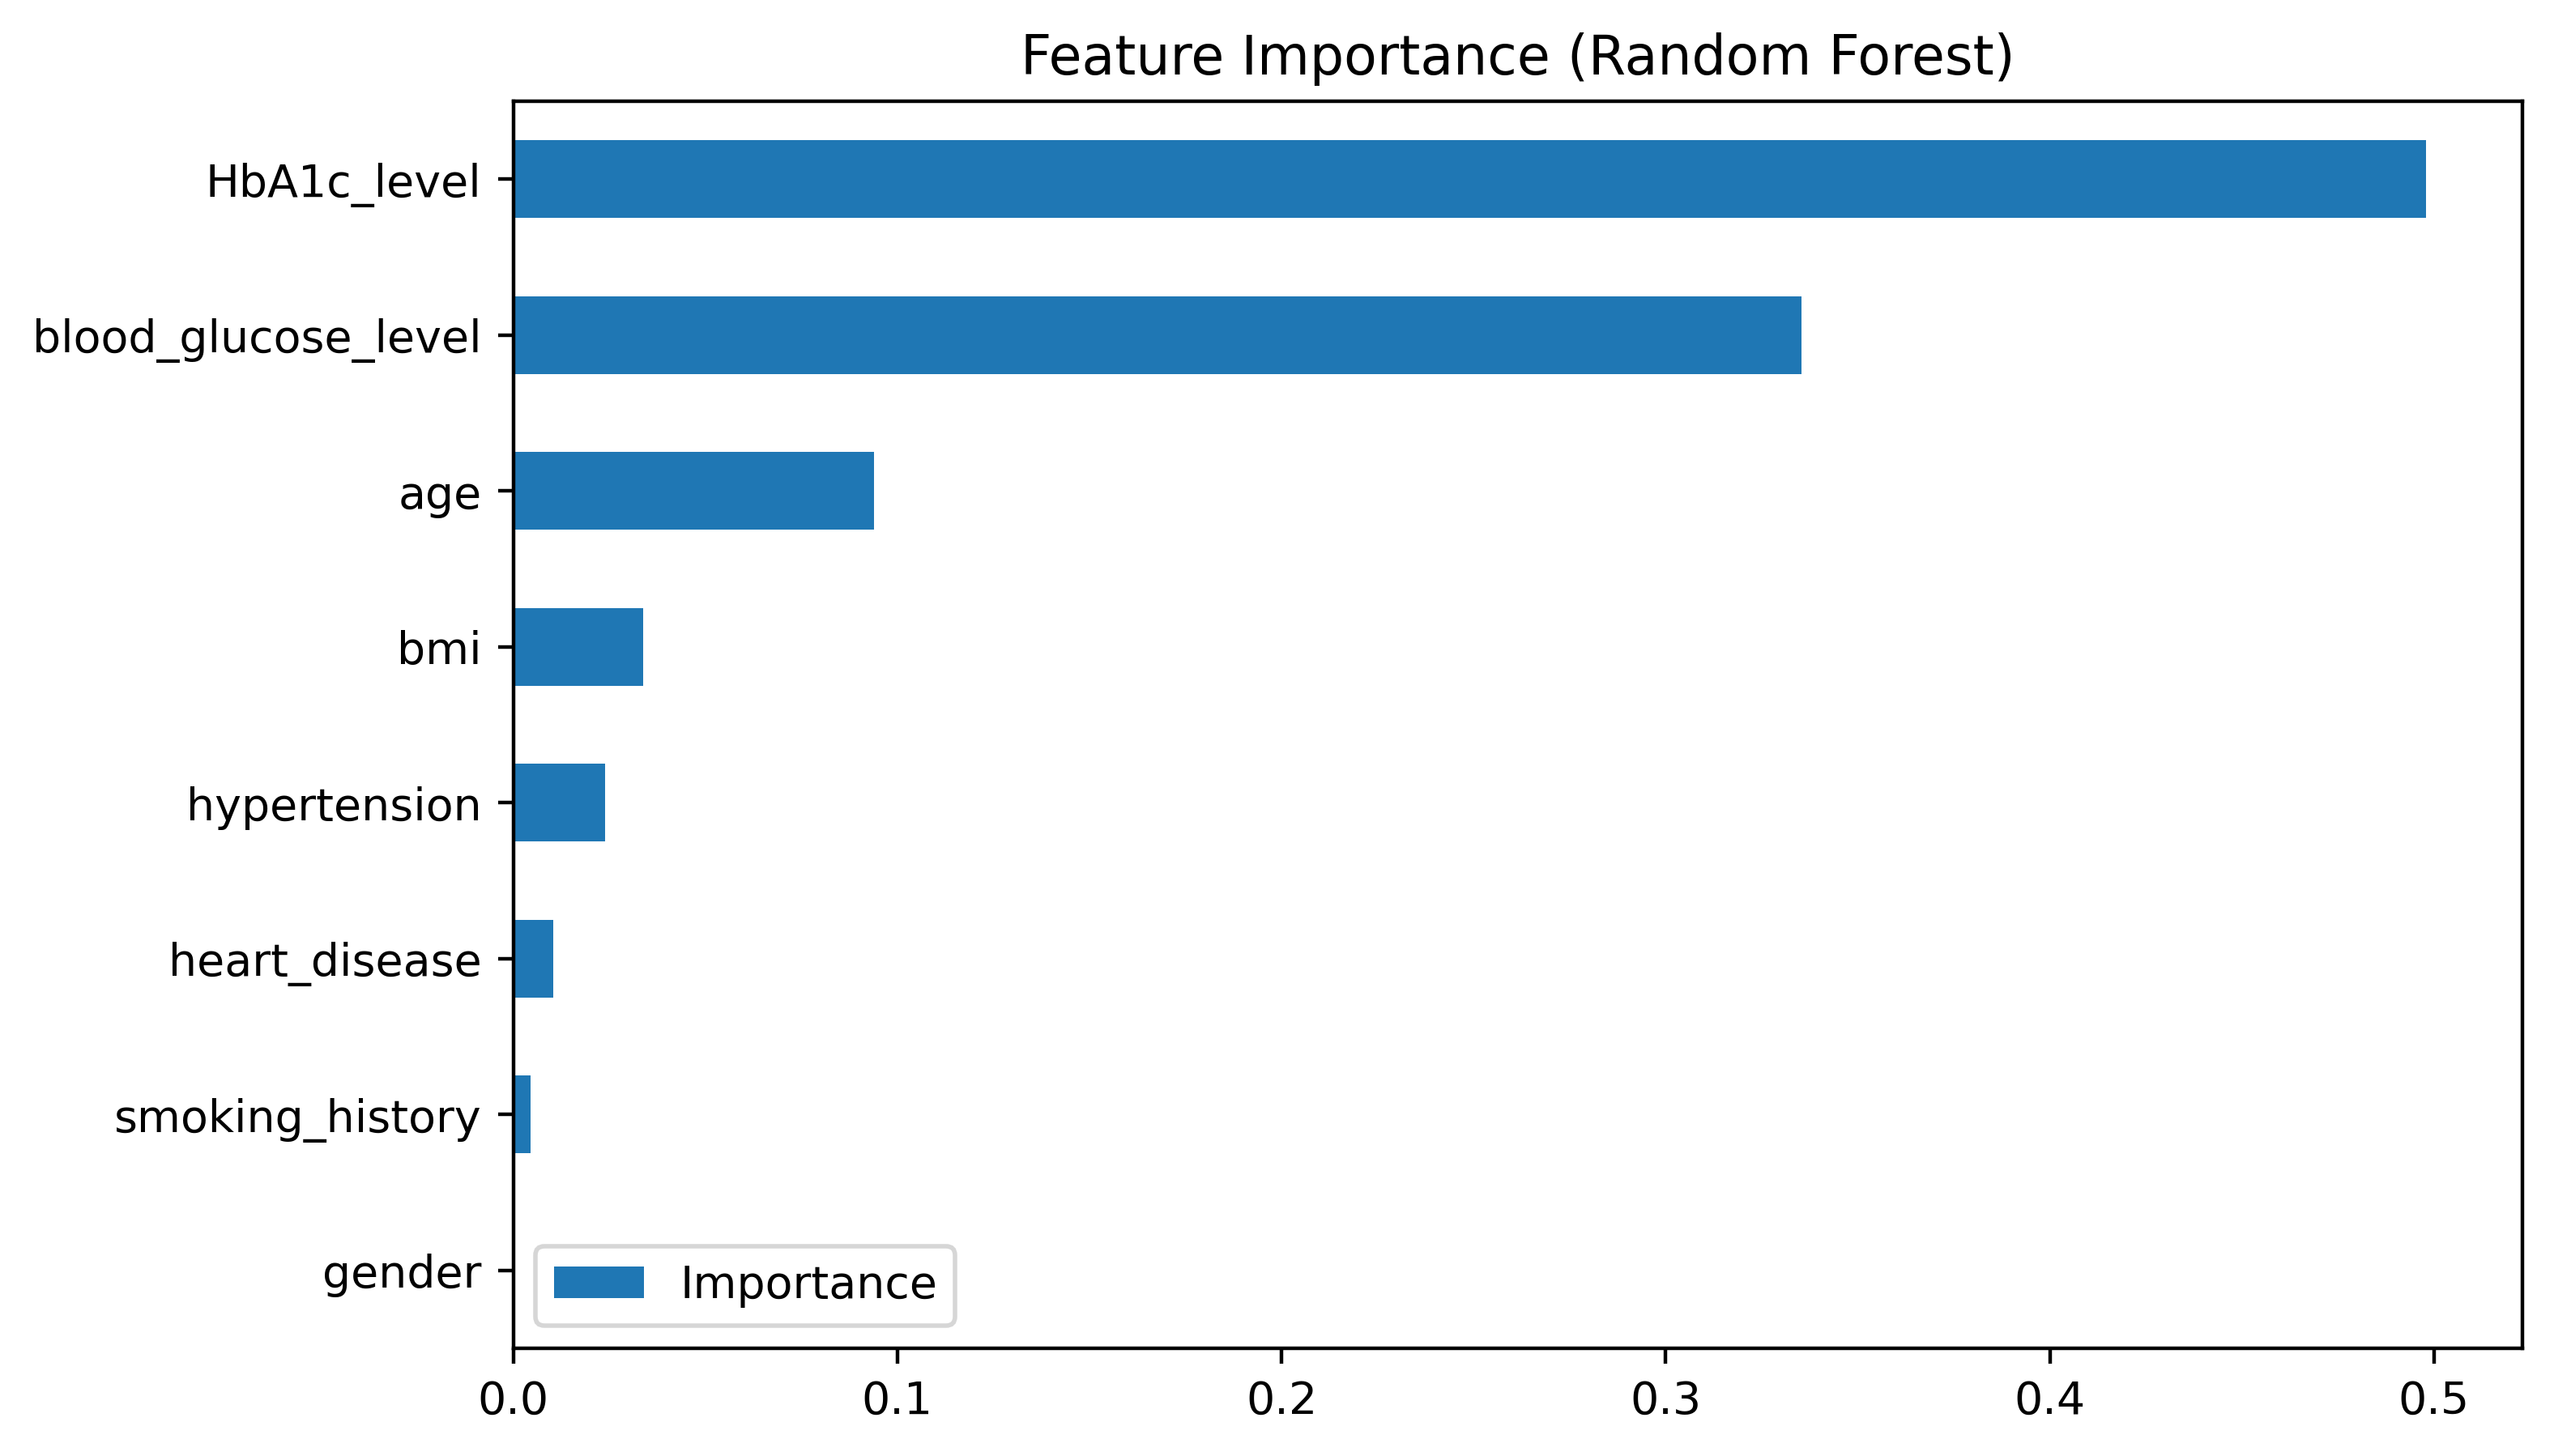

**Hình 2.1.4.5**: Mức độ quan trọng của các đặc trưng trong Random Forest.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Đọc & xử lý dữ liệu
df = pd.read_csv('diabetes_prediction_dataset.csv')

X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Mã hóa các cột dạng chuỗi thành số
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# 2. Tạo mô hình Random Forest ban đầu
rf = RandomForestClassifier(
    n_estimators=10, # số cây ban đầu
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=4
)

# 3. Dùng GridSearchCV để tìm số cây tối ưu
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}  # 10,20,...100
cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',    # đánh giá theo ROC AUC
    cv=4,                 # 4-fold cross validation
    verbose=1,
    return_train_score=True
)

cv_rf_ex.fit(X_train, y_train)

# 4. Vẽ biểu đồ kết quả
cv_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Thời gian huấn luyện
axs[0].plot(cv_results_df['param_n_estimators'], cv_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

# ROC AUC trên tập test
axs[1].errorbar(cv_results_df['param_n_estimators'],
                cv_results_df['mean_test_score'],
                yerr=cv_results_df['std_test_score']/np.sqrt(4),
                fmt='-o')
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ± 1 SE')

plt.tight_layout()
plt.show()
display(Markdown("**Hình 2.1.4.4**: Mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC."))


# Xem thông số tốt nhất
print("Best number of trees:", cv_rf_ex.best_params_)
print("Best ROC AUC:", cv_rf_ex.best_score_)

# 5. Feature Importance
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}, index=X.columns)

feat_imp_df.sort_values('Importance', ascending=True).plot.barh(figsize=(8,5))
plt.title("Feature Importance (Random Forest)")
plt.show()
display(Markdown("**Hình 2.1.4.5**: Mức độ quan trọng của các đặc trưng trong Random Forest."))

# 2.2. GIẢI THUẬT 2: SUPPORT VECTOR MACHINE (SVM)

## 2.2.1. Ôn tập lý thuyết

**1. Giải thuật Support Vector Machine (SVM) hoạt động như thế nào — ranh giới phân tách (hyperplane) và lề (margin)**  
- SVM tìm một **siêu phẳng (hyperplane)** để phân tách dữ liệu thành các lớp khác nhau sao cho khoảng cách từ siêu phẳng tới các điểm dữ liệu gần nhất của mỗi lớp là **lớn nhất**.  
- **Lề (margin)** là khoảng cách từ siêu phẳng tới các điểm dữ liệu gần nhất ở mỗi phía. SVM cố gắng **tối đa hóa lề** để mô hình tổng quát tốt hơn, ít bị overfit.

---

**2. Vai trò của các vector hỗ trợ (support vectors)**  
- **Support vectors** là các điểm dữ liệu **nằm gần siêu phẳng nhất** và quyết định vị trí của siêu phẳng.  
- Chúng quan trọng vì:  
  - Chỉ cần các điểm này để xác định ranh giới phân tách, các điểm xa không ảnh hưởng.  
  - Nếu dịch chuyển hoặc loại bỏ các support vector, siêu phẳng có thể thay đổi đáng kể.  
  - Giúp mô hình gọn nhẹ, không cần xét tất cả dữ liệu để quyết định ranh giới.

---

**3. Sự khác biệt giữa SVM lề cứng (hard margin) và lề mềm (soft margin)**  
- **Hard margin SVM**:  
  - Yêu cầu phân tách dữ liệu **hoàn hảo**, không chấp nhận điểm nào nằm sai phía siêu phẳng.  
  - Chỉ áp dụng khi dữ liệu **tuyệt đối tuyến tính và không có nhiễu**.  
- **Soft margin SVM**:  
  - Cho phép một số điểm **vi phạm lề hoặc phân loại sai**, nhằm tăng tính tổng quát và xử lý dữ liệu nhiễu.  
  - Thường dùng trong thực tế vì dữ liệu hiếm khi phân tách hoàn hảo.

---

**4. Hàm nhân (kernel) trong SVM và các loại kernel phổ biến**  
- **Kernel** là hàm ánh xạ dữ liệu từ không gian ban đầu sang **không gian đặc trưng có chiều cao hơn** để tìm siêu phẳng phân tách dễ dàng hơn.  
- Các loại phổ biến:  
  - **Linear Kernel**: dùng khi dữ liệu **tuyến tính hoặc gần tuyến tính**.  
  - **Polynomial Kernel**: ánh xạ dữ liệu thành đa thức bậc cao, phù hợp khi dữ liệu có quan hệ phi tuyến nhẹ và có mức độ phức tạp vừa phải.  
  - **RBF (Radial Basis Function / Gaussian Kernel)**: phổ biến nhất, xử lý tốt dữ liệu phi tuyến phức tạp, thường dùng mặc định khi không biết quan hệ dữ liệu.  

---

**5. Tham số C trong SVM**  
- **C** là hệ số điều chỉnh giữa **tối đa hóa lề** và **giảm lỗi phân loại**:  
  - **C lớn** → mô hình cố gắng phân loại chính xác tất cả điểm (lề hẹp, dễ overfit).  
  - **C nhỏ** → chấp nhận một số điểm sai để có lề rộng hơn, mô hình tổng quát tốt hơn.  

---

**6. Các bước xây dựng mô hình SVM phân loại bằng Python (Scikit-learn)**  
- Bước 1: Chuẩn bị dữ liệu (đọc file CSV, chọn đặc trưng và nhãn mục tiêu).  
- Bước 2: Chia dữ liệu thành tập train/test.  
- Bước 3: Chuẩn hóa dữ liệu (scale) vì SVM nhạy cảm với độ lớn đặc trưng.  
- Bước 4: Khởi tạo mô hình `SVC` với kernel phù hợp (linear, rbf, polynomial).  
- Bước 5: Huấn luyện mô hình với `fit()`.  
- Bước 6: Dự đoán và đánh giá kết quả (accuracy, confusion matrix…).

```python
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Tạo dữ liệu ví dụ
X, y = datasets.load_iris(return_X_y=True)

# 2. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Khởi tạo và huấn luyện SVM
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

# 5. Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


### Bài làm mẫu

#### Bài toán 1: Thực hiện các nhiệm vụ trong bài toán 1 để xây dựng mô hình với giải thuật SVM cho dữ liệu Iris-data 

**Nguồn dữ liệu**: https://www.kaggle.com/code/xvivancos/tutorial-knn-in-the-iris-data-set

##### Nhiệm vụ 1: Xây dựng mô hình SVM để phân loại các loài hoa cẩm chướng

###### 1. Tải dữ liệu về, nạp dữ liệu, xem thông tin các feature có trong tập dữ liệu và chuẩn bị dữ liệu cho xây dựng mô hình


In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Download&Load dữ liệu iris từ datasets của scikit-learn
iris = datasets.load_iris()
# Hiển thị mô ta dữ liệu, chỉ có trong các bộ dữ liệu chuẩn và mở để học tập và nghiên cứu
print(iris.DESCR)
# Từ tập dữ liệu ban đầu, tách lấy ma trận biểu diễn các đặc trưng và nhãn.
data = iris.data
target = iris.target
# TODO: Chia dữ liệu và nhãn thành 2 tập dữ liệu huấn luyện và dữ liệu kiểm tra theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(data, target, 
test_size 
 = 0.2, random_state=101)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

###### 2. Tạo mô hình SVM với dữ liệu đã chuẩn bị

In [7]:
from sklearn import svm
# khởi tạo mô hình phân lớp
clf = svm.SVC()
# Sử dụng phương thức 'fit' để huấn luyện mô hình với dữ liệu huấn luyện và nhãn huấn luyện
# fit (X,Y) với X là tập các đối tượng, Y là tập nhãn tương ứng của đối tượng.
clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


###### 3. Đánh giá độ chính xác của mô hình

In [8]:
# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_acc = clf.score(X_train,y_train)
val_acc = clf.score(X_test,y_test)
print('Training accuracy: {}'.format(train_acc))
print('Validation accuracy: {}'.format(val_acc))

Training accuracy: 0.95
Validation accuracy: 0.9666666666666667


###### 4. Tìm tham số kernel tối ưu cho mô hình SVM

In [11]:
# best_svm, best_val_acc và best_kernel lần lượt là các biến lưu mô hình tốt nhất,
# độ chính xác cao nhất trên tập kiểm tra và kernel tốt nhất
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None
# Huấn luyện các mô hình dựa trên dữ liệu huấn luyện và tham số kernel
# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra để tìm được mô hình tốt nhất
for i in range(4):
 clf = svm.SVC(kernel=kernels[i], probability=True)
 clf.fit(X_train, y_train)
 tmp_val_acc = clf.score(X_test, y_test)
 if (tmp_val_acc > best_val_acc):
     best_val_acc = tmp_val_acc
     best_svm = clf
     best_kernel = kernels[i]
# Hiển thị mô hình tốt nhất cùng với độ chính xác
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc, 
best_kernel)) 
# Mô hình tốt nhất của bạn nên có độ chính xác xấp xỉ 86,67%

Best validation accuracy : 1.0 with kernel: linear


#### Bài toán 2: Xây dựng mô hình dựa vào giải thuật SVM trên dữ liệu hình ảnh Handwritten-Digit-MNIST-SVM.

**Nguồn dữ liệu**: https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm 

##### Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh

###### 1. Import thư viện và tải dữ liệu là tập các hình ảnh viết tay từ số 0 đến số 9

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

###### 2. Khảo sát thông tin có trong digits

In [13]:
#thông tin toàn bộ dữ liệu đã tải về
digits
#xem thông tin của một hình dưới dạng ma trận 8 x 8
digits['data'][0].reshape(8,8)
#xem thông tin của một hình dưới dạng mảng
digits['data'][0]
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

###### 3. Vẽ ra hình dựa vào dữ liệu dạng ma trận 8 x 8

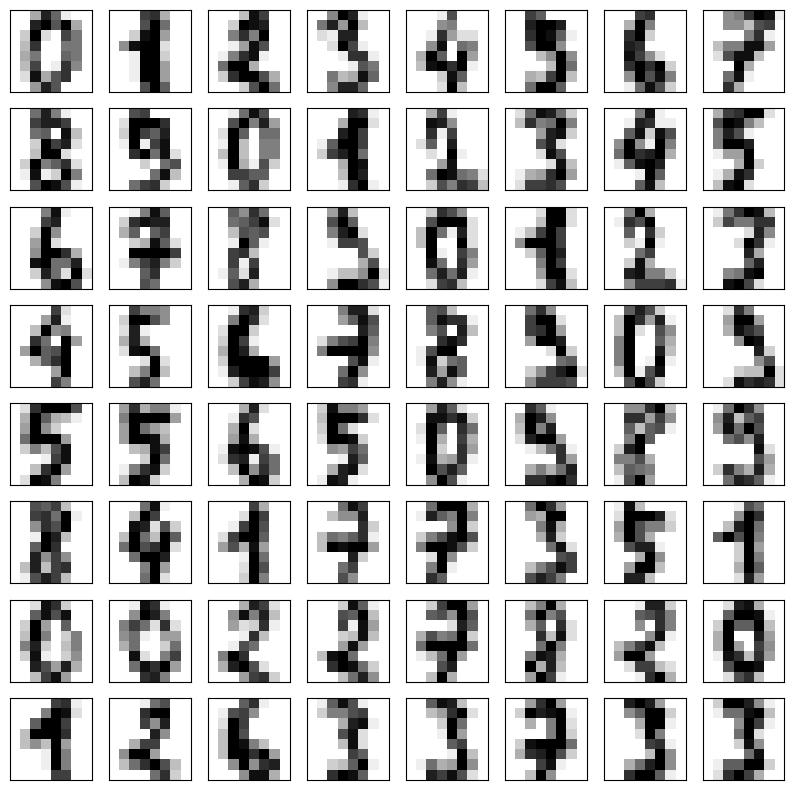

In [15]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method. 
fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
 axi.imshow(digits.images[i], cmap='binary')
 axi.set(xticks=[], yticks=[])


###### 4. Vẽ một ảnh từ ma trận 8 x 8

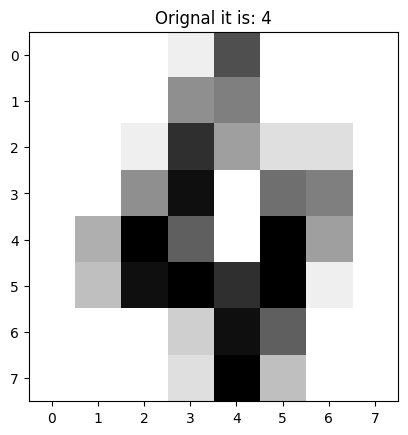

In [16]:
# Hàm vẽ 1 ảnh có kích thước 8 x 8 (ảnh lấy từ ma images)
def view_digit(index):
 plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
 plt.title('Orignal it is: '+ str(digits.target[index]))
 plt.show()
# vẽ ảnh ở vị trí thứ 4
view_digit(4)

##### Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

###### 1. Chuẩn bị dữ liệu và xây dựng mô hình SVM

In [18]:
# Thực hiện import các thư viện cần thiết để xây dựng mô hình SVM
# Thực hiện bước 1 của nhiệm vụ 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes. 
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term. 
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500]) 
predictions = svc.predict(main_data[1501:]) 
# list(zip(predictions , targets[1501:]))

###### 2. Đánh giá hiệu quả của mô hình với Confusion Matrix

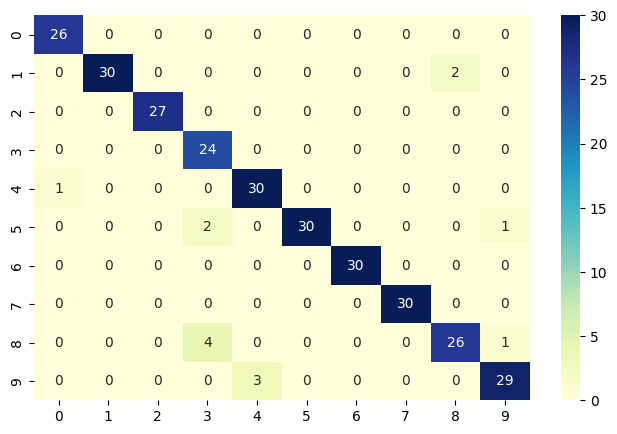

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(data = cm)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

###### 3. In kết quả dạng văn bản

In [20]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



### 2.2.3. Bài tập thực hành 1

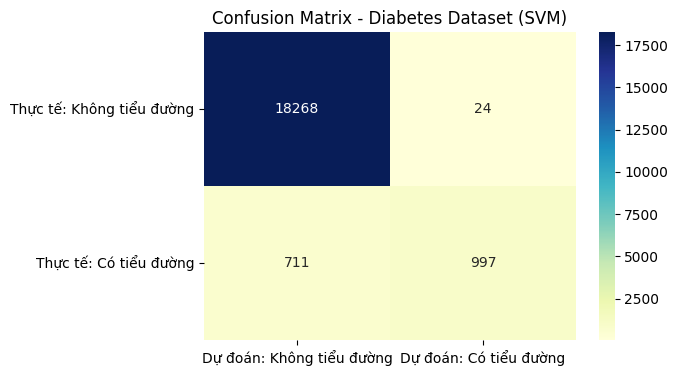

Báo cáo đánh giá mô hình SVM trên Diabetes Dataset:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.58      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [22]:
# 1. Chuẩn bị dữ liệu và xây dựng mô hình SVM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Đọc dữ liệu diabetes.csv
data = pd.read_csv("diabetes.csv")

# One-hot encode categorical features
categorical_cols = ['gender', 'smoking_history']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Tách features (X) và target (y)
X = data.drop("diabetes", axis=1)   # "diabetes" là nhãn: 0 = Không tiểu đường, 1 = Có tiểu đường
y = data["diabetes"]

# Chia dữ liệu thành train (80%) và test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Khởi tạo mô hình SVM
svc = svm.SVC(kernel="rbf", gamma=0.001, C=100)

# Huấn luyện mô hình
svc.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = svc.predict(X_test)
# 2. Đánh giá hiệu quả của mô hình với Confusion Matrix
cm = confusion_matrix(y_test, y_pred)   # y_true, y_pred
conf_matrix = pd.DataFrame(data=cm,
                           index=["Thực tế: Không tiểu đường", "Thực tế: Có tiểu đường"],
                           columns=["Dự đoán: Không tiểu đường", "Dự đoán: Có tiểu đường"])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - Diabetes Dataset (SVM)")
plt.savefig("Confusion Matrix - Diabetes Dataset (SVM).png", dpi=300, bbox_inches='tight')
plt.show()
# 3. In kết quả dạng văn bản (Classification Report)
print("Báo cáo đánh giá mô hình SVM trên Diabetes Dataset:")
print(classification_report(y_test, y_pred))

Theo kết quả trên, ta thấy mô hình SVM hoạt động khá tốt với độ chính xác tổng thể 96%, tức là dự đoán đúng phần lớn các trường hợp. Tuy nhiên, khi phân tích chi tiết thì mô hình lại dự đoán rất chính xác nhóm không bị tiểu đường (recall = 1.00, f1-score = 0.98), nhưng với nhóm có tiểu đường thì recall chỉ đạt 0.58, nghĩa là bỏ sót khá nhiều bệnh nhân thật sự. Điều này dẫn đến sự mất cân bằng trong hiệu quả phân loại: Precision cao nhưng recall thấp ở lớp dương tính. Với bối cảnh ứng dụng y tế, việc bỏ sót bệnh nhân có thể gây rủi ro, nên cần cải thiện recall, ví dụ như dùng kỹ thuật cân bằng dữ liệu hoặc tinh chỉnh tham số mô hình để giảm thiểu lỗi loại II.

### 2.2.4. Bài tập thực hành 2

5 dòng đầu tiên của dữ liệu:
  AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  
0  Dehydration       Yes  
1        Pains       Yes  
2     Anorexia       Yes  
3     Sneezing       Yes  
4     Blue Eye       Yes  


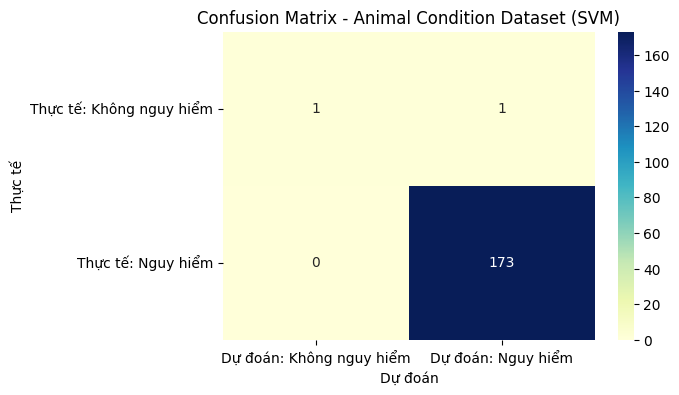

Báo cáo đánh giá mô hình SVM trên Animal Condition Dataset:
                 precision    recall  f1-score   support

Không nguy hiểm       1.00      0.50      0.67         2
      Nguy hiểm       0.99      1.00      1.00       173

       accuracy                           0.99       175
      macro avg       1.00      0.75      0.83       175
   weighted avg       0.99      0.99      0.99       175



In [23]:
# 1. Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# 2. Đọc dữ liệu Animal Condition
data = pd.read_csv("animal_condition.csv")

print("5 dòng đầu tiên của dữ liệu:")
print(data.head())

# 3. Xử lý dữ liệu
# Encode cột nhãn (Dangerous) thành số
le = LabelEncoder()
data["Dangerous_encoded"] = le.fit_transform(data["Dangerous"])

# One-hot encoding cho các cột dạng chuỗi
categorical_cols = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
data = pd.get_dummies(data.drop("Dangerous", axis=1), columns=categorical_cols, drop_first=True)

# 4. Tách features (X) và target (y)
X = data.drop("Dangerous_encoded", axis=1)
y = data["Dangerous_encoded"]

# 5. Chia dữ liệu train/test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Khởi tạo và huấn luyện mô hình SVM
svc = svm.SVC(kernel="rbf", gamma=0.001, C=100)
svc.fit(X_train, y_train)

# 7. Dự đoán
y_pred = svc.predict(X_test)

# 8. Đánh giá mô hình bằng Confusion Matrix
# Tạo nhãn hiển thị dễ hiểu
labels = ["Không nguy hiểm", "Nguy hiểm"]

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(
    data=cm,
    index=[f"Thực tế: {cls}" for cls in labels],
    columns=[f"Dự đoán: {cls}" for cls in labels]
)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Animal Condition Dataset (SVM)")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

# 9. In báo cáo phân loại
print("Báo cáo đánh giá mô hình SVM trên Animal Condition Dataset:")
print(classification_report(y_test, y_pred, target_names=labels))

Dựa trên kết quả ma trận nhầm lẫn và báo cáo đánh giá, có thể thấy mô hình SVM phân loại trên tập dữ liệu Animal Condition đạt độ chính xác tổng thể 99%, cho thấy hiệu quả rất cao. Tuy nhiên, do dữ liệu mất cân bằng (chỉ có 2 mẫu “Không nguy hiểm” so với 173 mẫu “Nguy hiểm”), mô hình gần như học thiên về dự đoán “Nguy hiểm”. Cụ thể, nhóm “Nguy hiểm” được nhận diện rất tốt (recall = 1.00, f1-score = 1.00), trong khi nhóm “Không nguy hiểm” lại có recall chỉ đạt 0.50 (1 mẫu bị dự đoán sai). Điều này dẫn đến mô hình tuy có accuracy cao nhưng lại thiếu ổn định với lớp dữ liệu ít. Vì vậy, khi triển khai thực tế, cần bổ sung thêm dữ liệu cân bằng hơn hoặc áp dụng các kỹ thuật xử lý mất cân bằng để mô hình có khả năng phân loại tốt cho cả hai nhóm.

# GIẢI THUẬT 3: BAYES NGÂY THƠ (NAÏVE BAYES)

## 2.3.1. Ôn tập lý thuyết

**1. Cách hoạt động**  

Naive Bayes dựa trên Định lý Bayes:  

$$ P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)} $$

Giả định “ngây thơ” rằng các đặc trưng độc lập có điều kiện → giúp tính toán đơn giản.

---

**2. Các loại mô hình**  
- **Gaussian NB**: cho dữ liệu liên tục (giả định phân phối chuẩn).  
- **Multinomial NB**: cho dữ liệu rời rạc (đếm, tần suất, văn bản).  
- **Bernoulli NB**: cho dữ liệu nhị phân (có/không).

---

**3. Vì sao gọi là “ngây thơ”**  
Do giả định độc lập giữa các đặc trưng (thường không đúng). Điều này có thể làm giảm hiệu suất khi đặc trưng phụ thuộc nhau.

---

**4. Ưu và nhược điểm**  
- **Ưu điểm**: Nhanh, đơn giản, hiệu quả với dữ liệu lớn và nhiều chiều (đặc biệt là văn bản).  
- **Nhược điểm**: Giả định mạnh, xác suất có thể không chính xác nếu các đặc trưng phụ thuộc.

---

**5. Code mẫu (Gaussian NB)**  

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Tải dữ liệu mẫu Iris
X, y = load_iris(return_X_y=True)

# 2. Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Huấn luyện mô hình Gaussian Naive Bayes
model = GaussianNB().fit(X_train, y_train)

# 4. Đánh giá
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

### Bài toán 1

In [26]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('spam.csv', encoding='latin-1')
#display the first 5 rows
data.head()
# Drop the columns with NaN values
data = data.drop(columns=['hotel', 'polarity', 'source'], axis=1)
# Rename columns for clarity:
data = data.iloc[:, :2]
data.columns = ['label', 'text']
# Separate features (X) and target labels (y)
X = data.drop('label', axis=1)
y = data['label']
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(classification_rep)

Accuracy: 0.87
Confusion Matrix:
[[139  13]
 [ 29 139]]
Classification Report:
              precision    recall  f1-score   support

   deceptive       0.83      0.91      0.87       152
    truthful       0.91      0.83      0.87       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320

              precision    recall  f1-score   support

   deceptive       0.83      0.91      0.87       152
    truthful       0.91      0.83      0.87       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



##### 2.3.2. Thực hành 1

5 dòng đầu tiên của dữ liệu:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Độ chính xác của mô hình: 0.93

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.82      0.88        28

    accuracy                           0.93        80
   macro avg       0.93      0.90      0.91        80
weighted avg       0.93      0.93      0.92        80



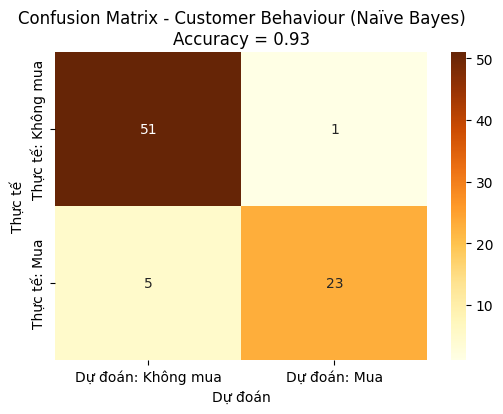

In [28]:
# 1. Import thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Đọc dữ liệu
file_path = "Customer_Behaviour.csv"
data = pd.read_csv(file_path)

print("5 dòng đầu tiên của dữ liệu:")
print(data.head())

# 3. Tách X (features) và y (target)
X = data.drop("Purchased", axis=1)   # các biến độc lập
y = data["Purchased"]                # biến mục tiêu

# Nếu có biến categorical (chuỗi), cần one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 4. Chia train/test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Khởi tạo mô hình Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 6. Dự đoán
y_pred = model.predict(X_test)

# 7. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))
# 8. Vẽ Confusion Matrix với nhãn "Không mua" và "Mua"
cm = confusion_matrix(y_test, y_pred)
labels = ["Không mua", "Mua"]

conf_matrix = pd.DataFrame(
    cm,
    index=[f"Thực tế: {label}" for label in labels],
    columns=[f"Dự đoán: {label}" for label in labels]
)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr")
plt.title(f"Confusion Matrix - Customer Behaviour (Naïve Bayes)\nAccuracy = {accuracy:.2f}")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

Kết quả cho thấy mô hình Naïve Bayes trong bài toán dự đoán hành vi mua hàng đạt độ chính xác 93%, tức là khả năng phân loại tổng thể khá tốt. Cụ thể, nhóm khách hàng không mua được nhận diện chính xác cao (recall = 0.98, precision = 0.91, f1-score = 0.94), trong khi nhóm mua hàng có precision = 0.96 nhưng recall chỉ đạt 0.82, dẫn đến một số khách hàng tiềm năng bị bỏ sót (5 trường hợp). Ma trận nhầm lẫn minh họa rõ điều này: 51 khách hàng không mua được dự đoán đúng, chỉ sai 1, còn 23 khách hàng mua được dự đoán đúng, sai 5. Như vậy, mô hình có xu hướng hoạt động ổn định, tuy nhiên để giảm thiểu việc bỏ sót khách hàng tiềm năng (FN), cần cải thiện recall ở nhóm “mua” bằng cách điều chỉnh tham số hoặc thử nghiệm thêm các mô hình khác như SVM, Random Forest.

##### Thực hành 2

Accuracy: 0.8073846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       843
           1       0.91      0.66      0.77       782

    accuracy                           0.81      1625
   macro avg       0.83      0.80      0.80      1625
weighted avg       0.83      0.81      0.80      1625



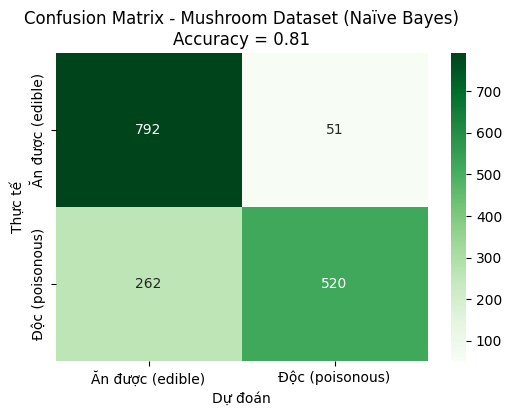

In [30]:
# Bài tập thực hành 2: Naïve Bayes trên Mushroom Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Nạp dữ liệu
data = pd.read_csv("mushrooms.csv")

# Encode tất cả cột
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("class", axis=1)
y = data["class"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Huấn luyện
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Đánh giá
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ["Ăn được (edible)", "Độc (poisonous)"]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - Mushroom Dataset (Naïve Bayes)\nAccuracy = {acc:.2f}")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

Kết quả cho thấy mô hình Naïve Bayes trên tập dữ liệu nấm đạt độ chính xác 81%, mức chấp nhận được nhưng chưa thật sự tốt trong bối cảnh nhạy cảm như nhận diện nấm độc. Nhìn vào báo cáo phân loại, nhóm ăn được (edible) có recall khá cao (0.94) nhưng precision thấp hơn (0.75), tức là mô hình dễ nhầm nấm độc thành nấm ăn được. Ngược lại, nhóm độc (poisonous) có precision cao (0.91) nhưng recall thấp (0.66), dẫn đến nhiều trường hợp nấm độc bị dự đoán sai thành nấm ăn được (262 mẫu). Ma trận nhầm lẫn cũng phản ánh rõ: trong khi 792 nấm ăn được được nhận diện đúng thì có tới 262 nấm độc bị phân loại sai. Điều này đặc biệt nguy hiểm vì lỗi loại II (FN) trong bài toán này có thể gây hậu quả nghiêm trọng. Do đó, mặc dù accuracy đạt 0.81, mô hình chưa phù hợp để ứng dụng thực tế. Cần cải thiện recall ở nhóm “độc” (ví dụ bằng cách cân nhắc lại đặc trưng, sử dụng mô hình mạnh hơn như Random Forest hoặc SVM) để đảm bảo an toàn khi triển khai.